# Infopillar Solution PVT LTD

## Intern:  Srividya 

## Domain: DataScience

## Task 4: Housing Prices Prediction.



# BOSTON_HOUSE_PRICE _PREDICTION

## Problem Statement:
    
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.
 The dataset has house prices of the Boston residual areas.
The expense of the house varies according to various factors like crime rate, number of rooms, etc.
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.
The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.


Dataset Naming
The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted



Miscellaneous Details
-Origin
The origin of the boston housing data is Natural.
-Usage
This dataset may be used for Assessment.
-Number of Cases
The dataset contains a total of 506 cases.
-Order
The order of the cases is mysterious.



Note:
Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000); Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.



## Business Goal:

Predict prices on the basis of new data.

## DESCRIPTION

## Variables:
    
There are 14 attributes in each case of the dataset. They are:
    
    
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

# Prediction for House Prices in Boston

In [1]:
#import all libaries
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\Srividya\Downloads\Boston.csv")
df.to_csv("BOSTON_HOUSE_SALES_PRICE _PREDICTION.csv",sep='\t')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  medv  
0    296     15.3  396.90   4.98  24.0  
1    242     17.8  396.90   9.14  21.6  
2    242     17.8  392.83   4.03  34.7  
3    222     18.7  394.63   2.94  33.4  
4    222     18.7  396.90   5.33  36.2  
..   ...      ...     ...    ...   ...  
501  273     21.0  391.99   9.67  22.4  
502  273     21.0  396.90   9.08  20.6  
503  273     21.0  396.90   5.64  23.9  
504  273     21.0  393.45   6.48  22.0  
505  273     21.0  396.90   7.88  11.9  

[506 rows x 15 columns]

Here All the columns are having continous data type.
We have Two Task One is Predicting House Prices and its Target column is 'medv'.
Second is We have to predict NOX level(Nitrogen Oxide level) in Boston.
Both columns are having continous data type.Hence it is a Regression Problem.

In [5]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

# Exploratory Data Analysis(EDA):

In [6]:
print("Shape of the dataset is : {}".format(df.shape))

Shape of the dataset is : (506, 15)


In [7]:
pd.set_option("display.max_rows", None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


All are numeric data type and no null values present.

In [9]:
#checks nulls values of columns if present any
df.isnull().sum().T

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

No null values present in all the columns

In [10]:
# Here lets change ‘medv’ column name to ‘Price’
df.rename(columns={'medv':'Price'}, inplace=True)

In [11]:
df.drop(columns = ['Unnamed: 0'], axis=1, inplace = True)

drop this column since it is of no use

<AxesSubplot:>

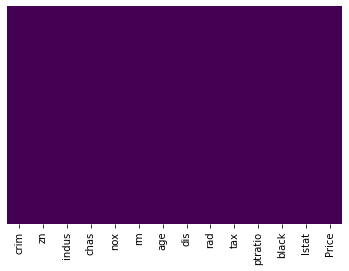

In [12]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# Top 10 Heatmap
corrmat = df.corr()
k = 15#number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index

In [14]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0                     Price
1                        rm
2                        zn
3                     black
4                       dis
5                      chas
6                       age
7                       rad
8                      crim
9                       nox
10                      tax
11                    indus
12                  ptratio
13                    lstat

These are the most correlated features with the target column

In [15]:
# Checking is there any duplicated data preset
df.duplicated().sum().any()

False

There is no duplicate values present in rows

# Visualization

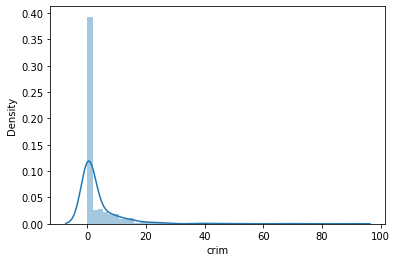

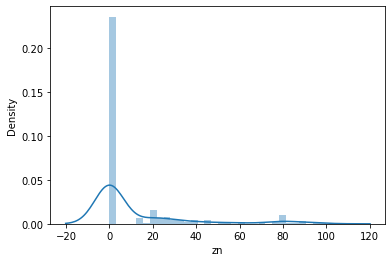

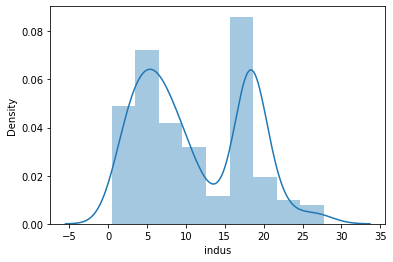

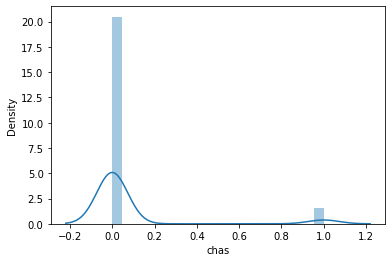

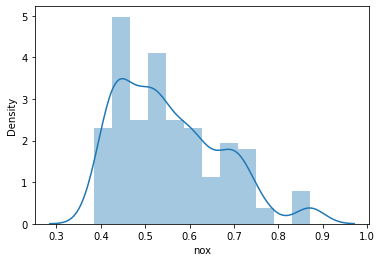

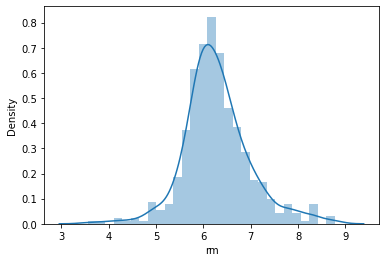

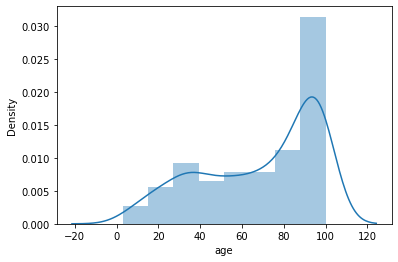

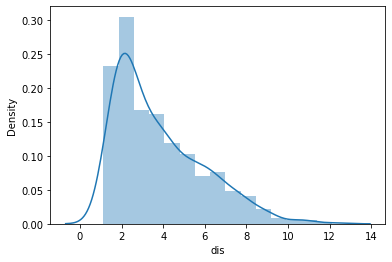

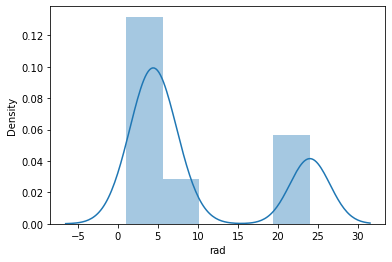

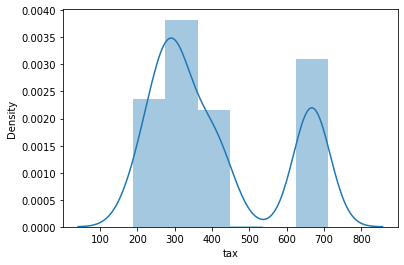

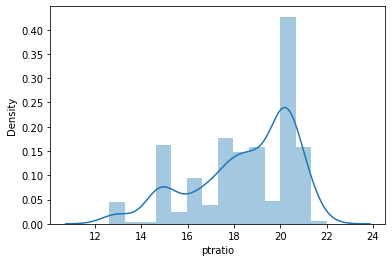

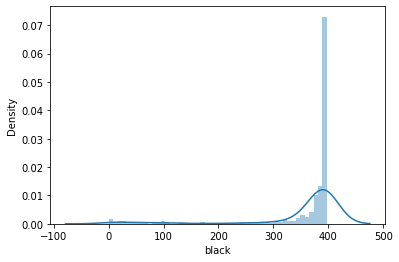

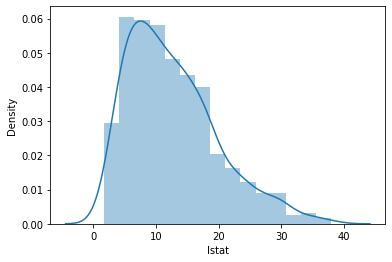

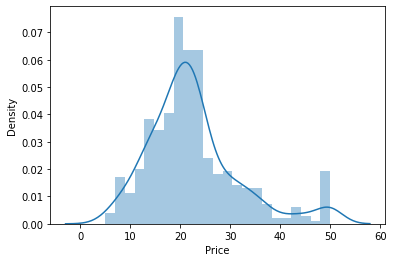

In [16]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

1.per capita crime rate by town is almost zero(0) most of the times.It seems there is less crime happens everywhere.
2.proportion of residential land zoned for lots over 25,000 sq.ft. is 0 most of the times.
3.proportion of non-retail business acres per town 5-8 and 18 mostly.
4.Tract does not bounds river because it is 0 mostly.
5.nitric oxides concentration is 0.5 and 0.6 parts per 10 million mostly.So the Air is pollution free mostly.
6.average number of rooms per dwelling is 6-7 mostly.
7.proportion of owner-occupied units built prior to 1940 is 90-100 mostly.
8.weighted distances to five Boston employment centres is 2-3 kms mostly.
9.index of accessibility to radial highways 5 and 24 mostly.
10.full-value property-tax rate per $10,000 is 300 and 700.
11.pupil-teacher ratio by town is 21 mostly.
12.1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town is 400 mostly.
13. % lower status of the population is in the range of 5-15.
14.Median value of owner-occupied homes in $1000's is 20 -25 i.e $20000-$25000


In [17]:
import matplotlib
import plotly.express as px

<AxesSubplot:>

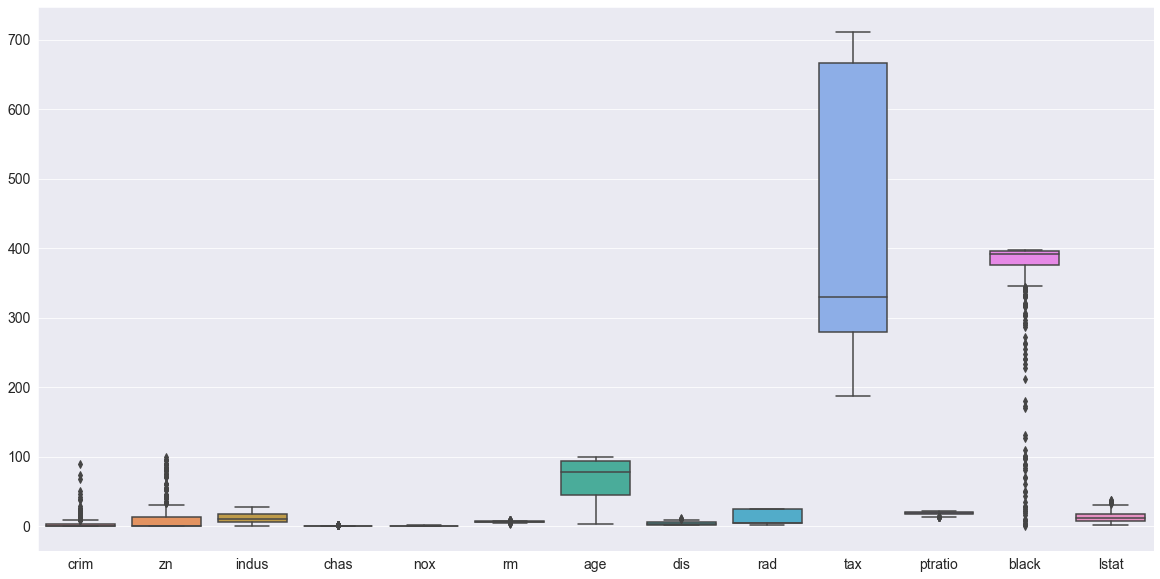

In [18]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.figure(figsize = (20 ,10))
sns.boxplot(data=df.drop('Price' , axis=1))

Tax rate in number comparison is higher among all

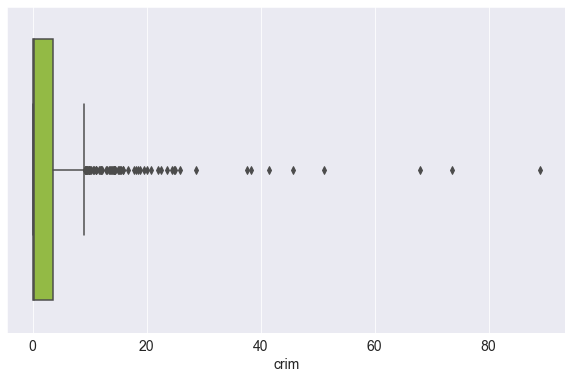

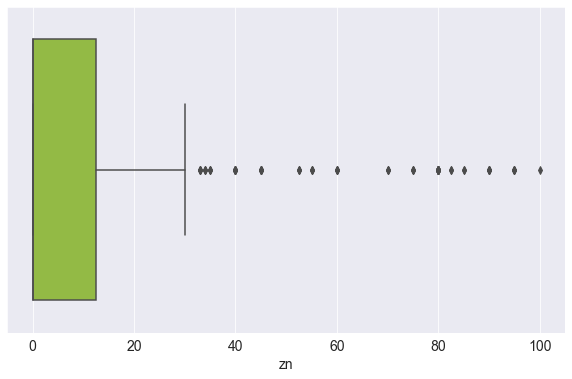

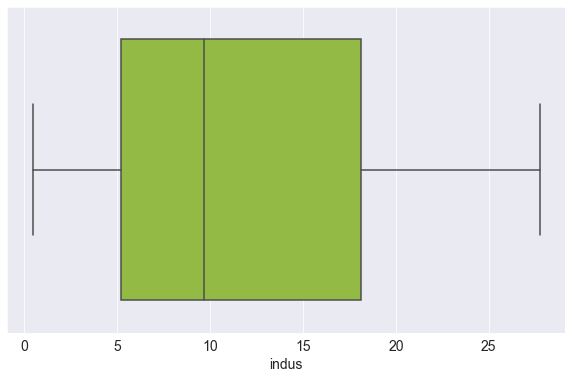

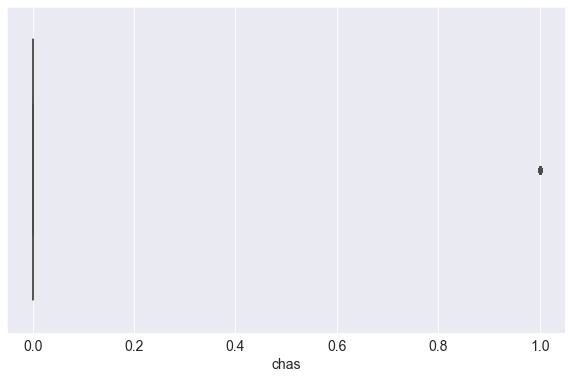

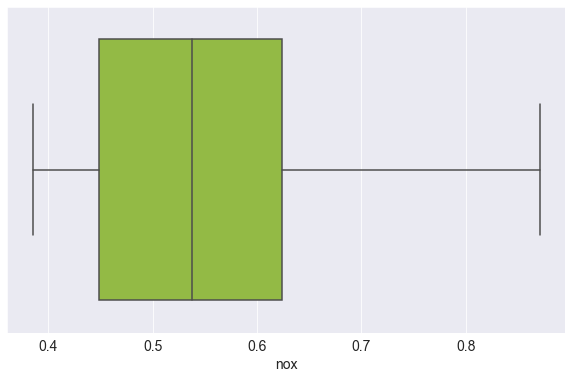

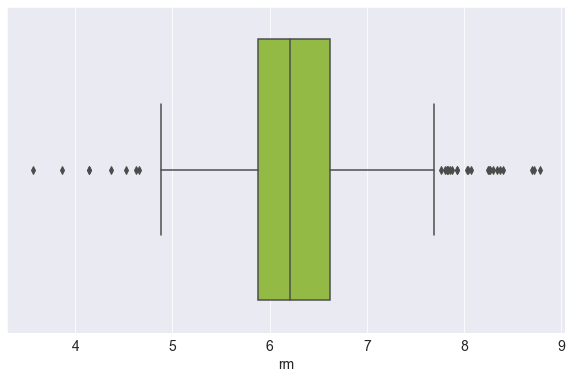

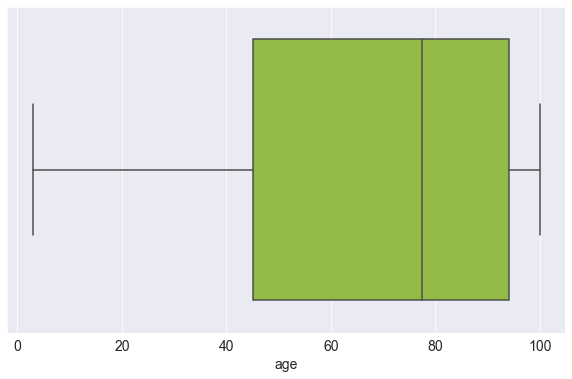

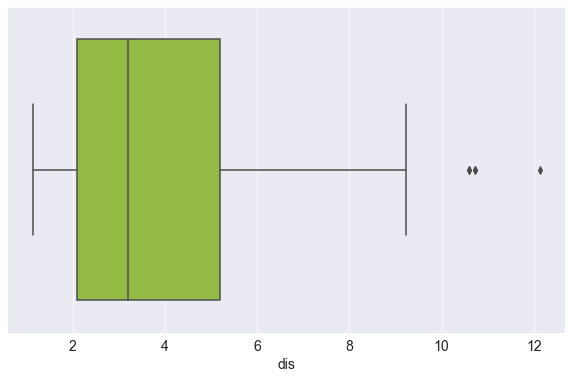

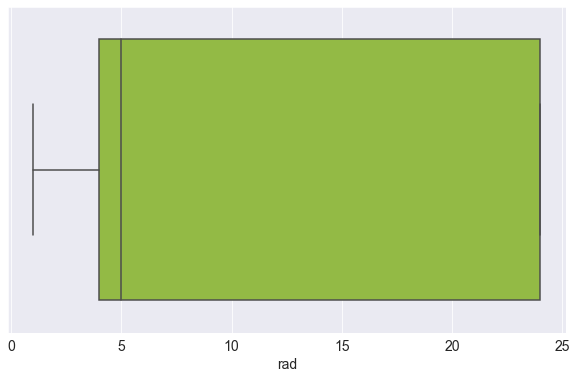

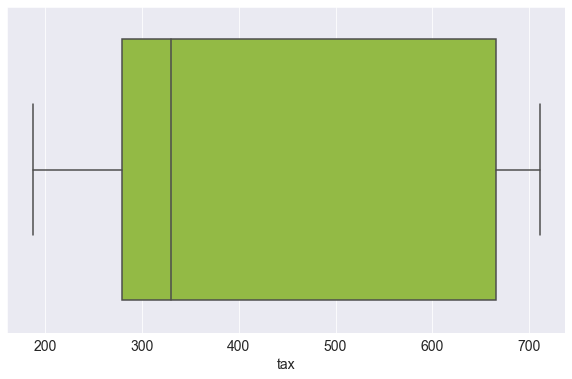

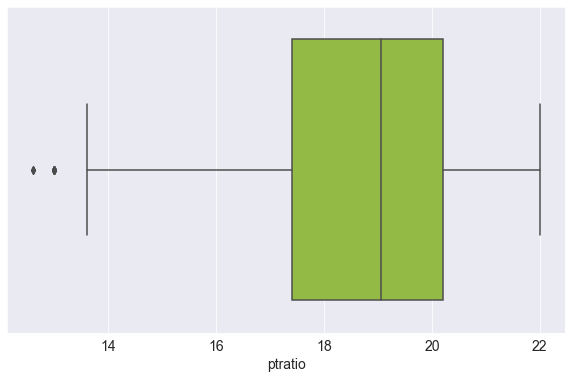

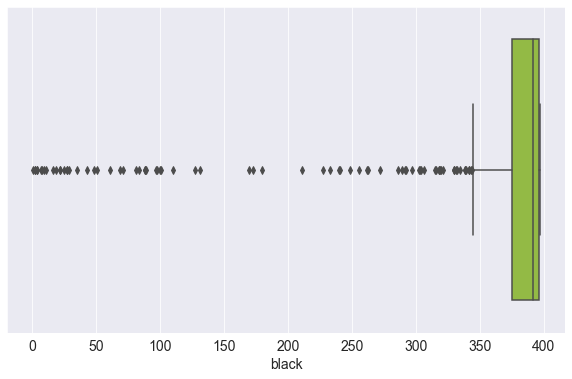

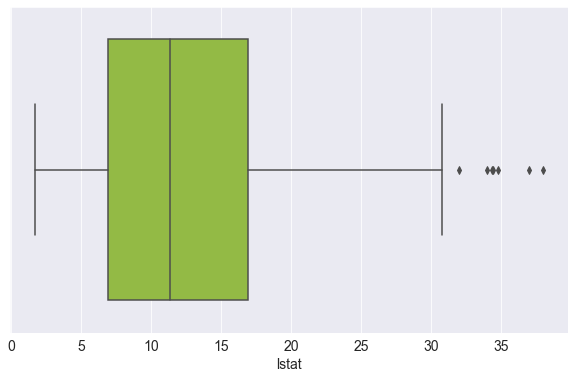

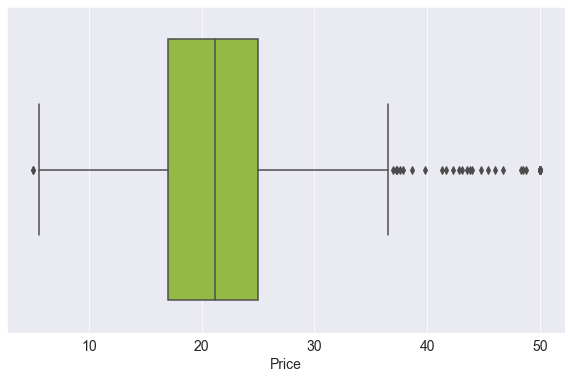

In [19]:

for i in df.columns:
    sns.boxplot(x = i, data = df ,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()

This shows median value for all the variables

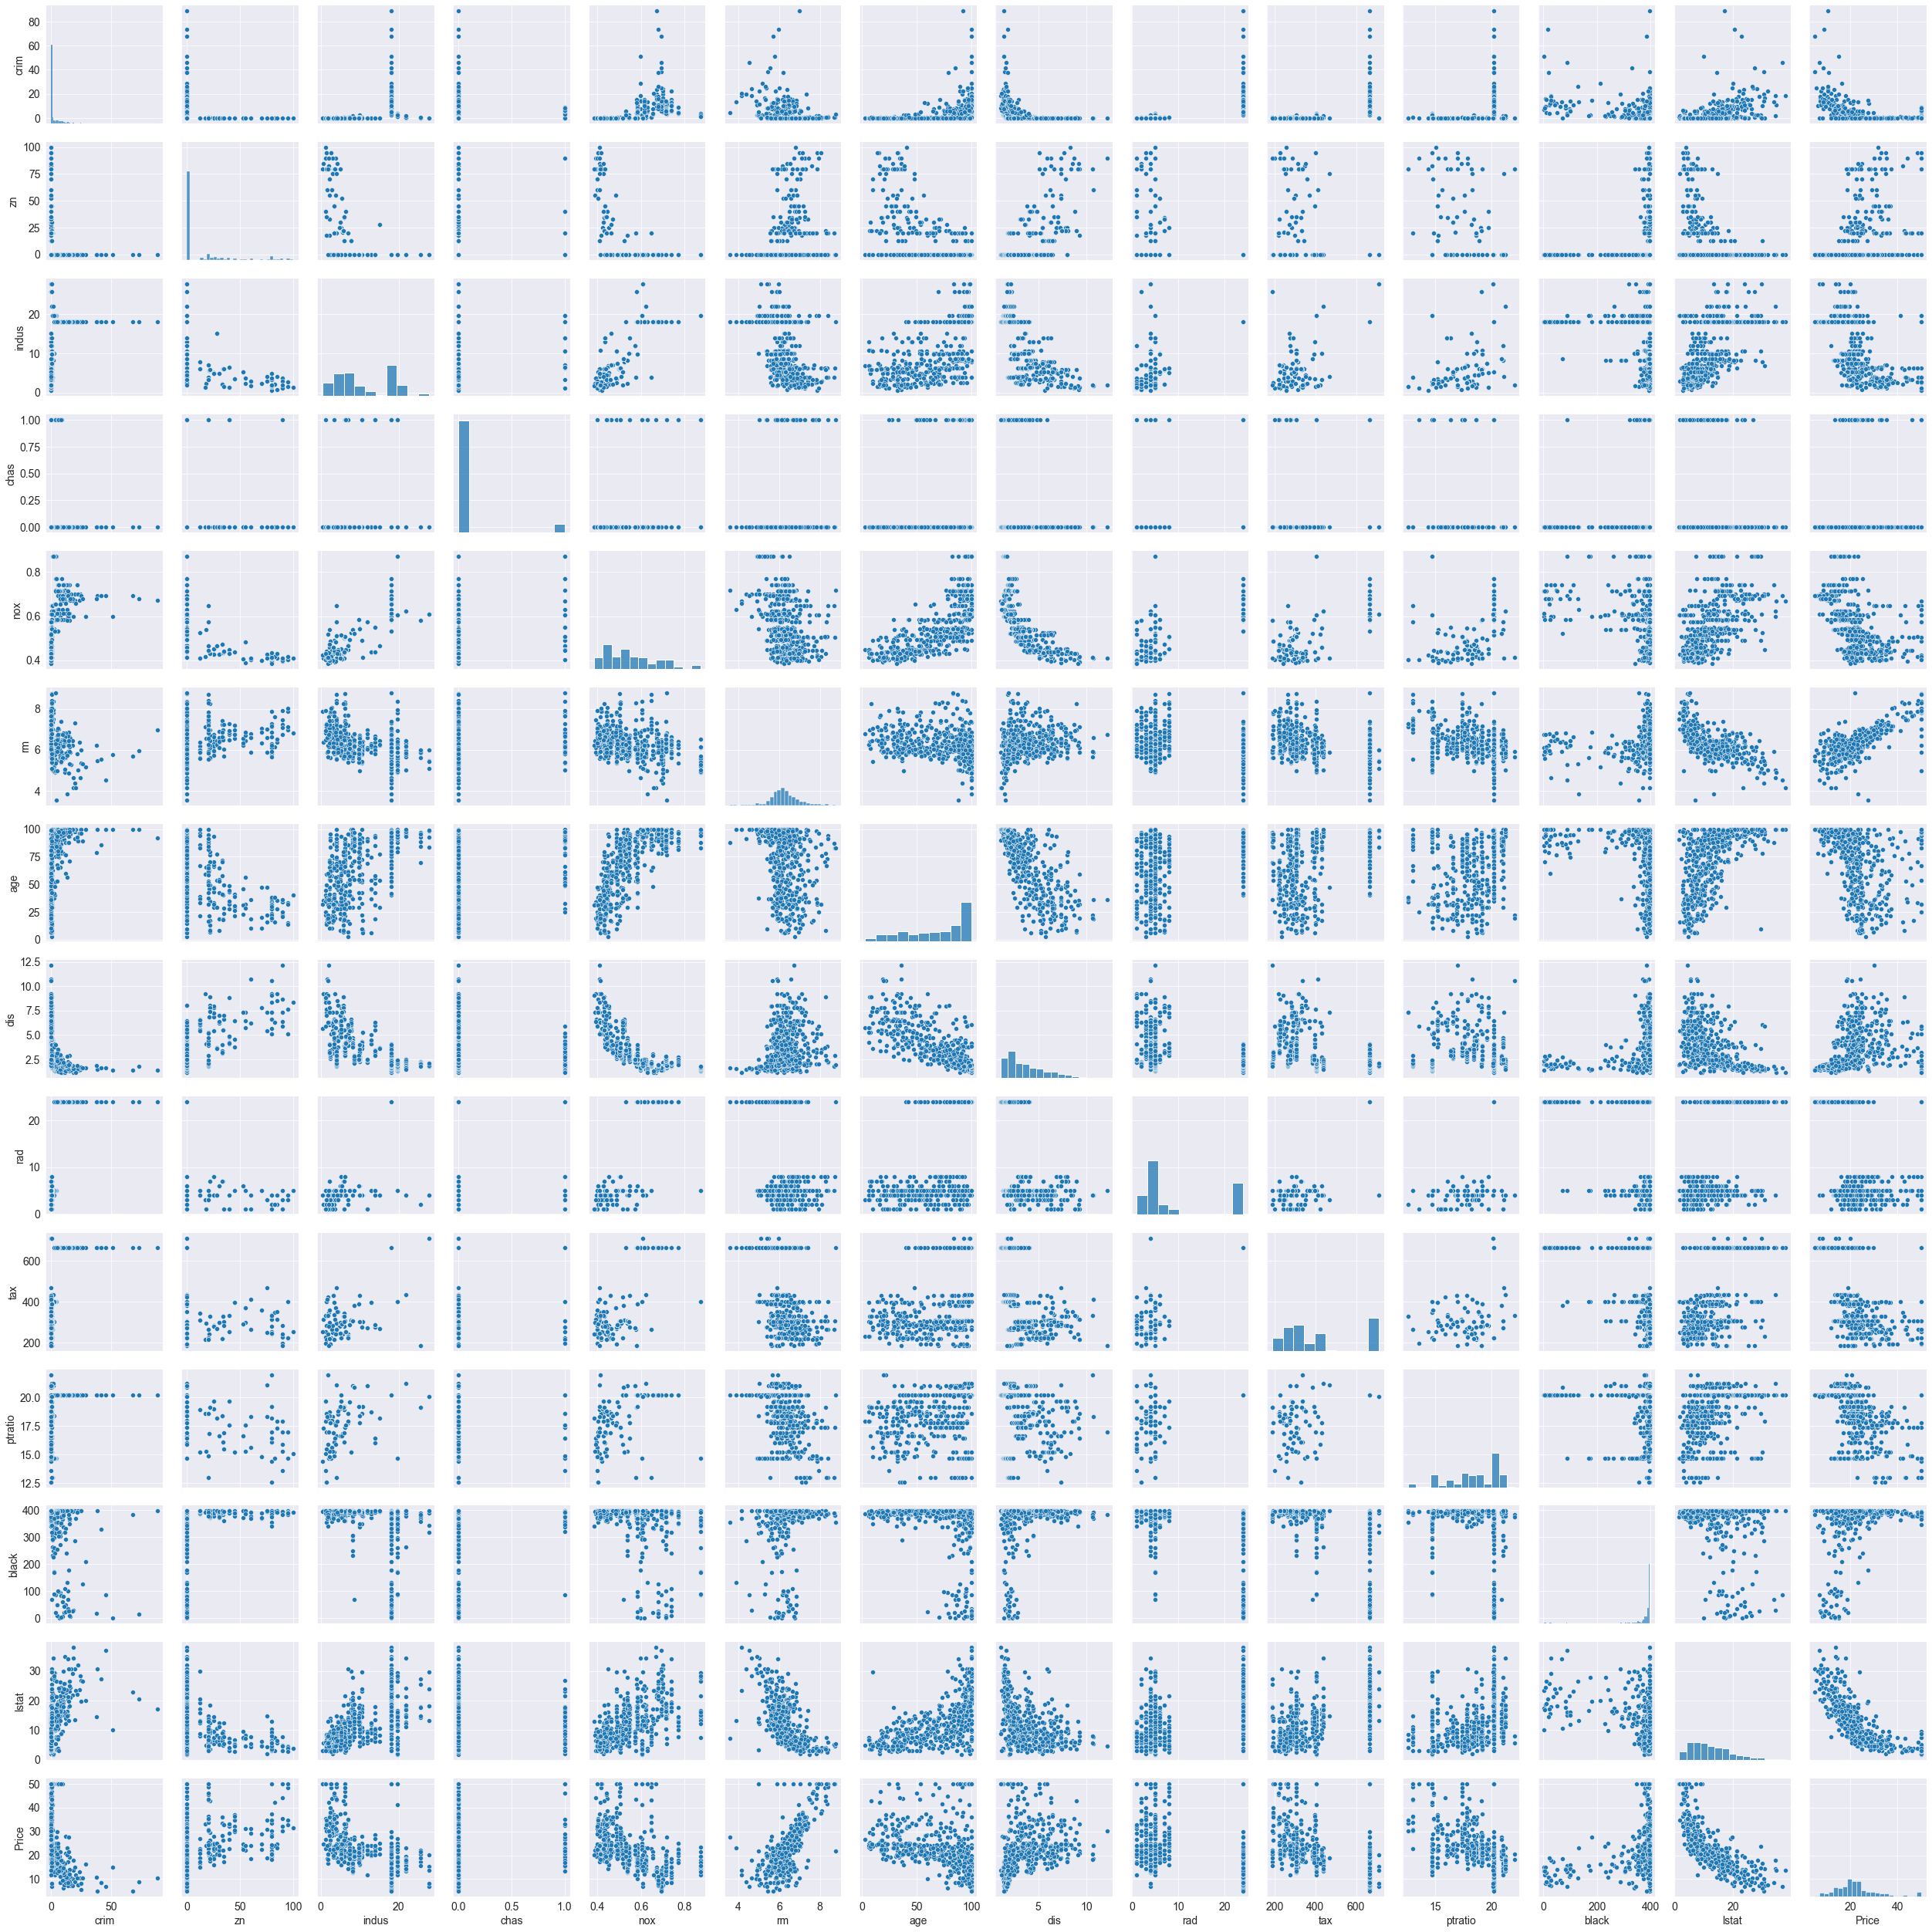

In [20]:
sns.pairplot(df)
plt.tight_layout()

1.Increase in crim rate cause not much impact on price of the house
2.Price of the houseincreases when tract doesnt bounds river
3.Price of the house decreases when nox level increases.
4.Price of the house increases when room numbers increases.
5.Price of the house decreases when age of the house increases
6.Price of the house has no much impact when pupile teacher ratio increases.
7.Price of the house has no much impact when Black people ratio increases.
8.Price of the house decreases when lower status of the population increases.


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

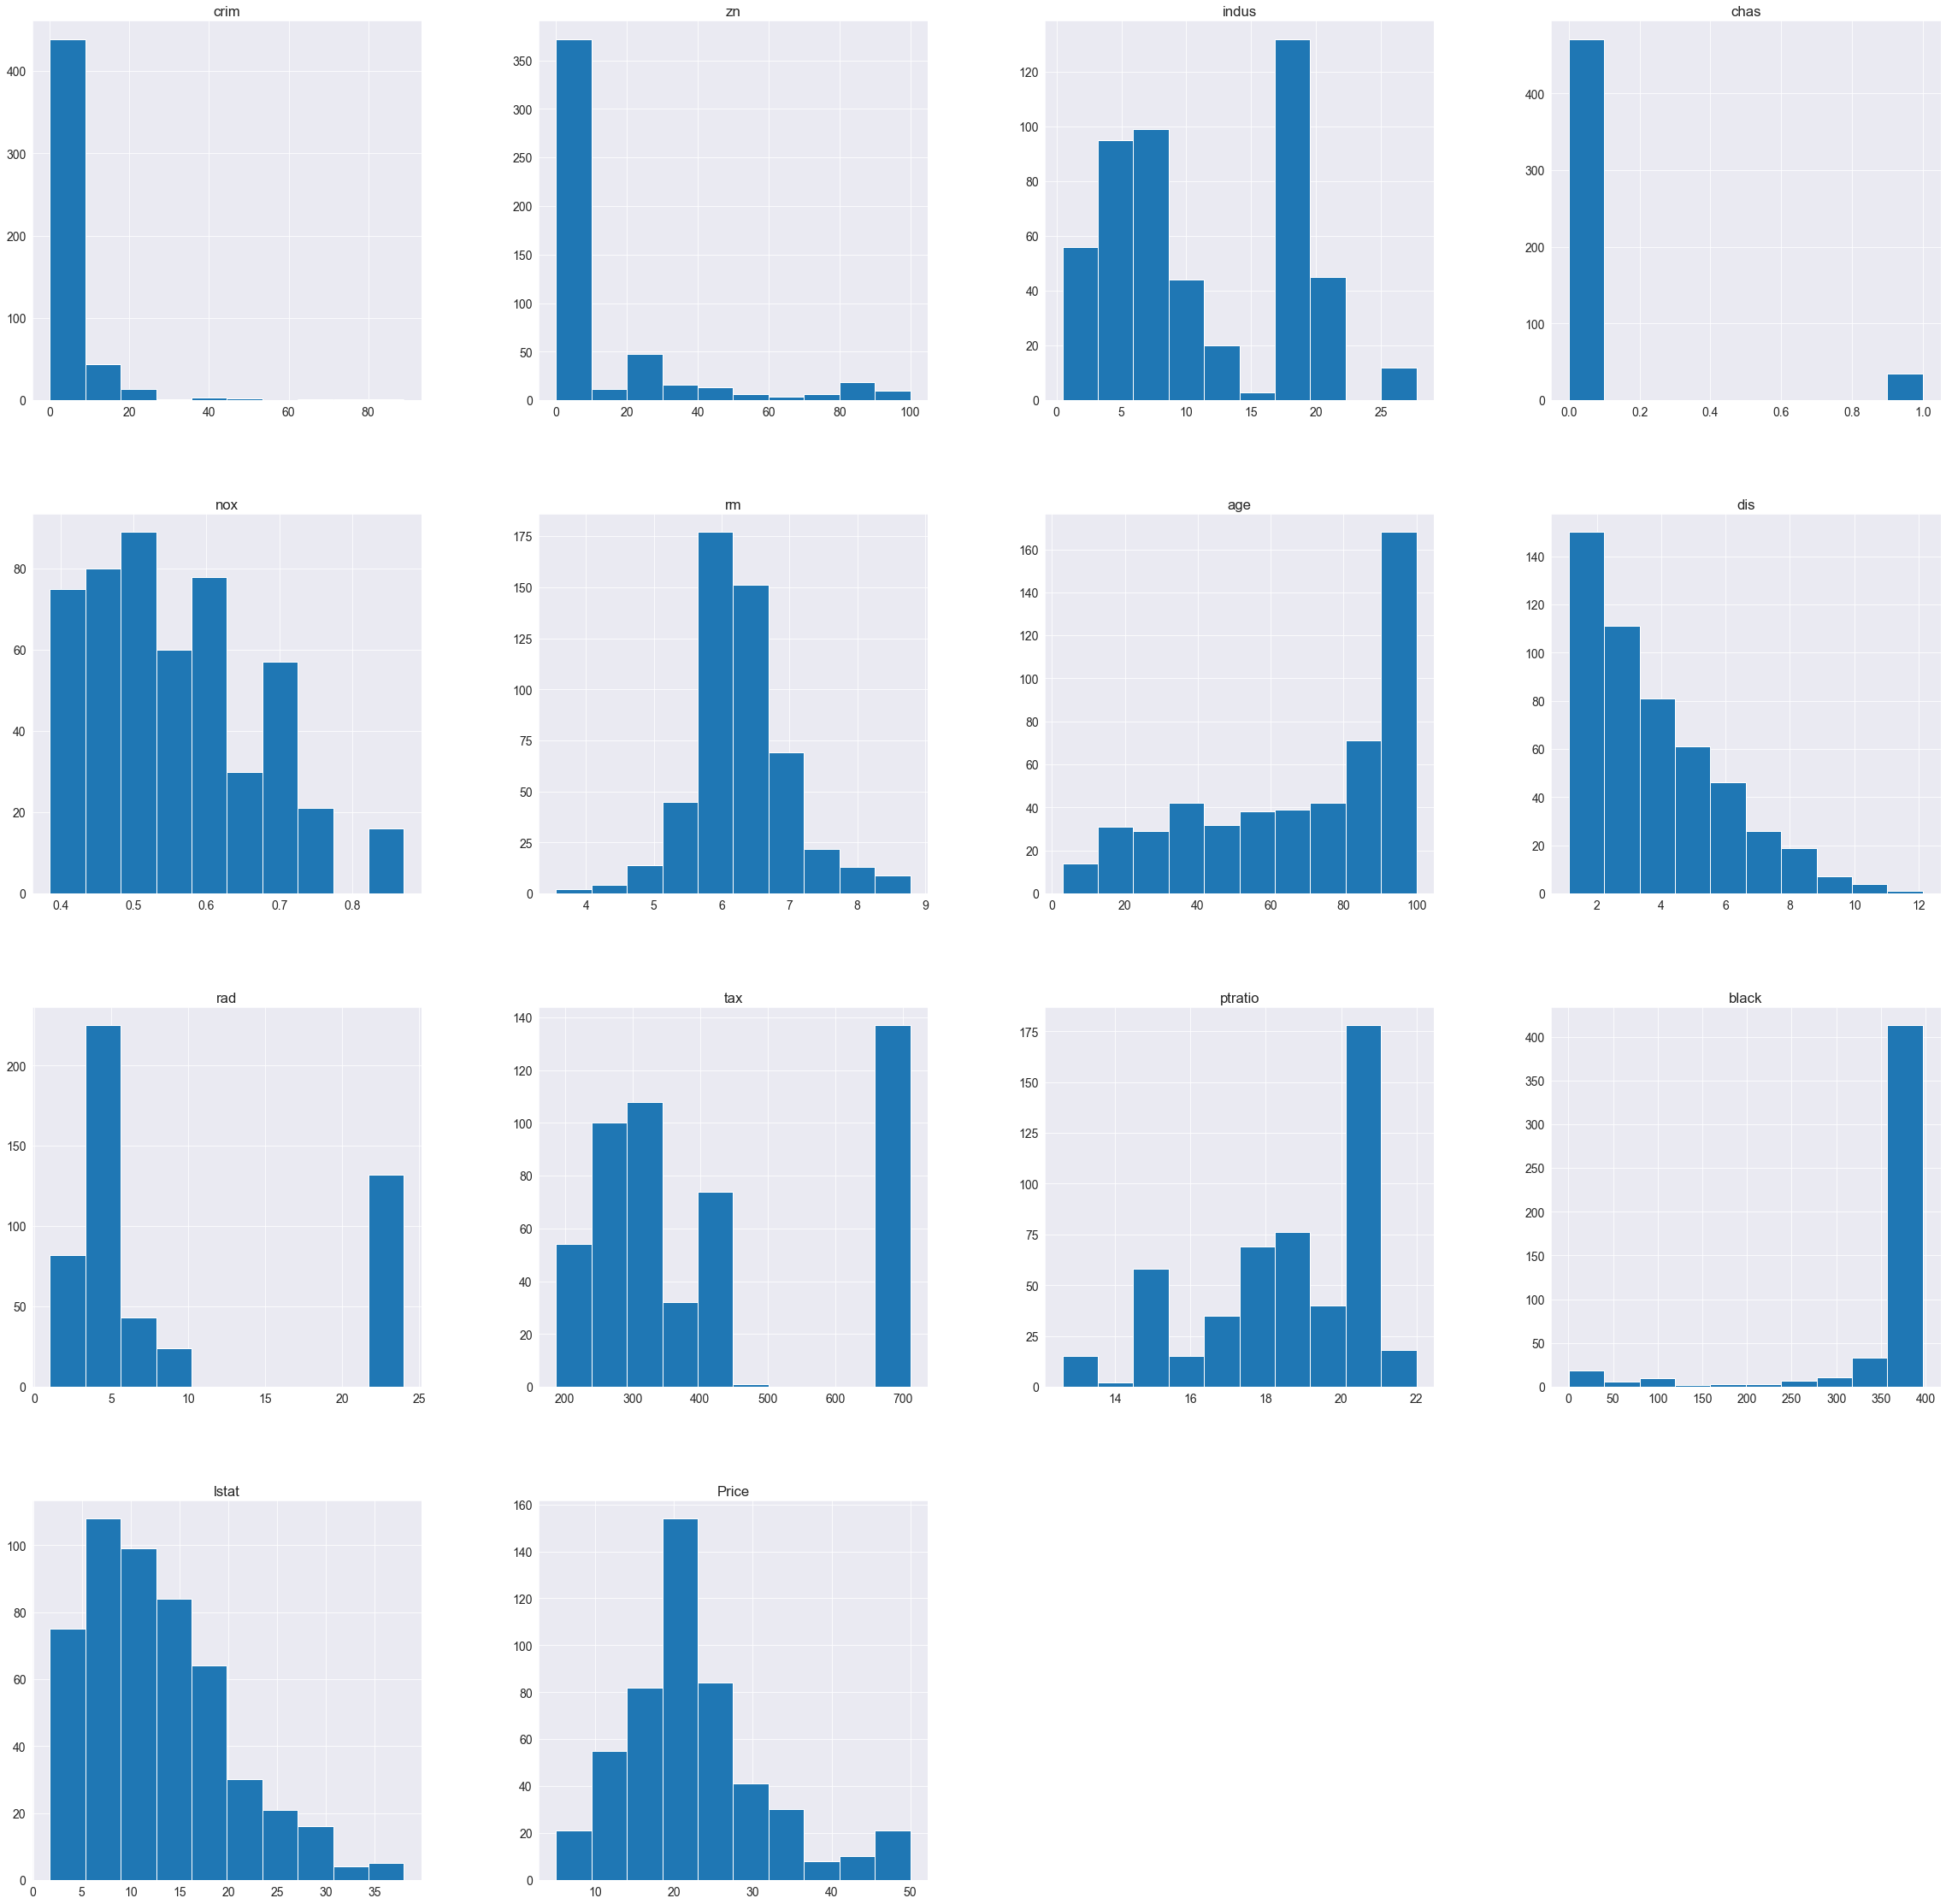

In [21]:
# creating histograms to visualize all the data
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
df.hist(ax = ax)

In [22]:
df_columns=['zn', 'indus', 'chas', 'nox', 'rad', 'tax',
       'ptratio']

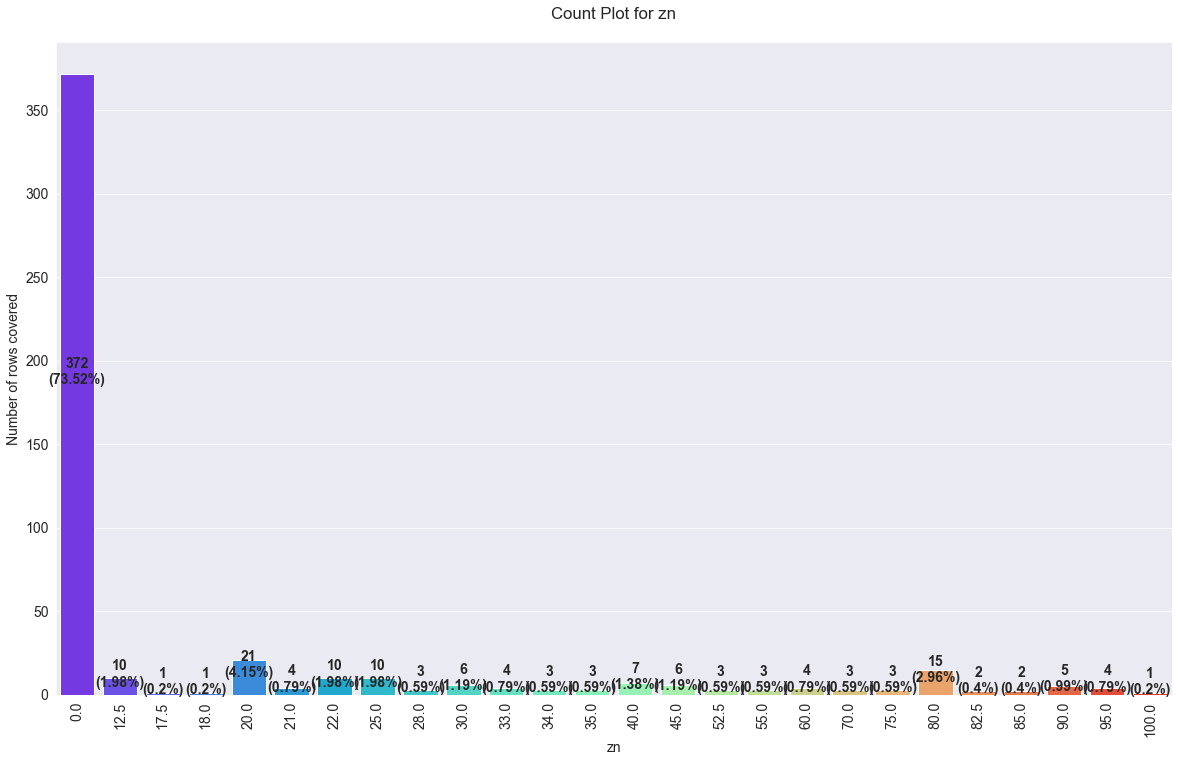

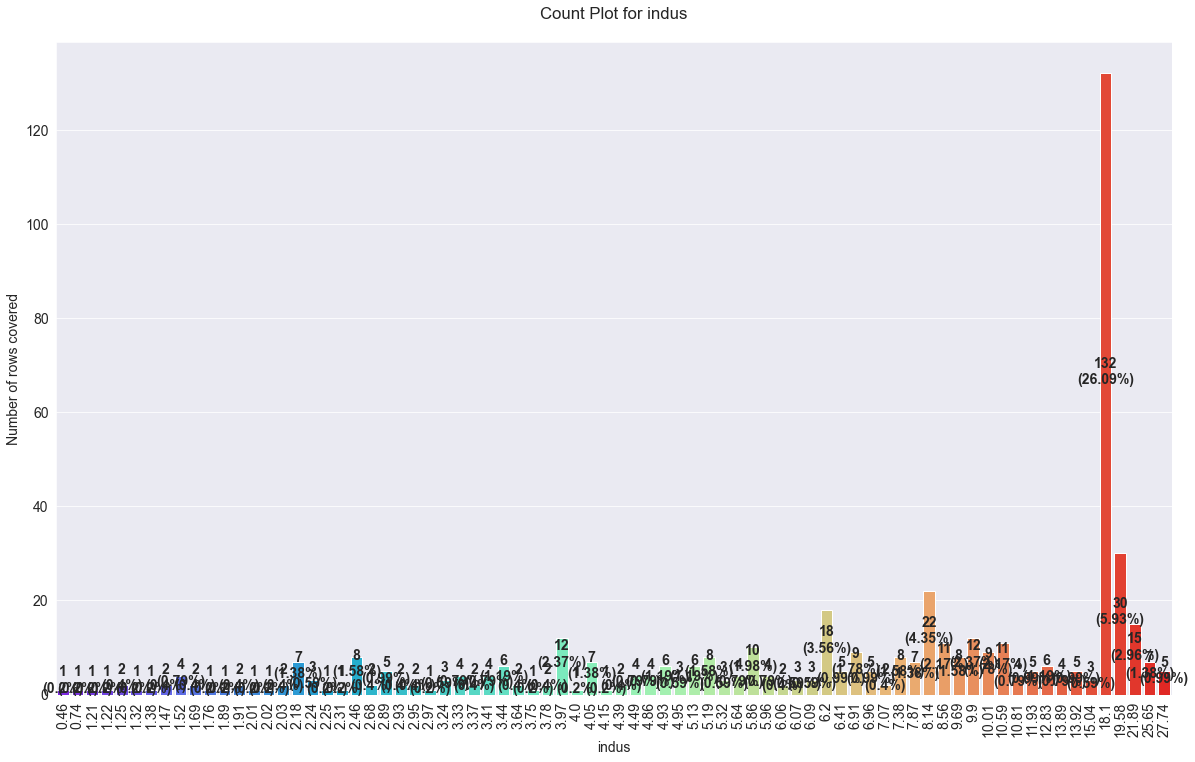

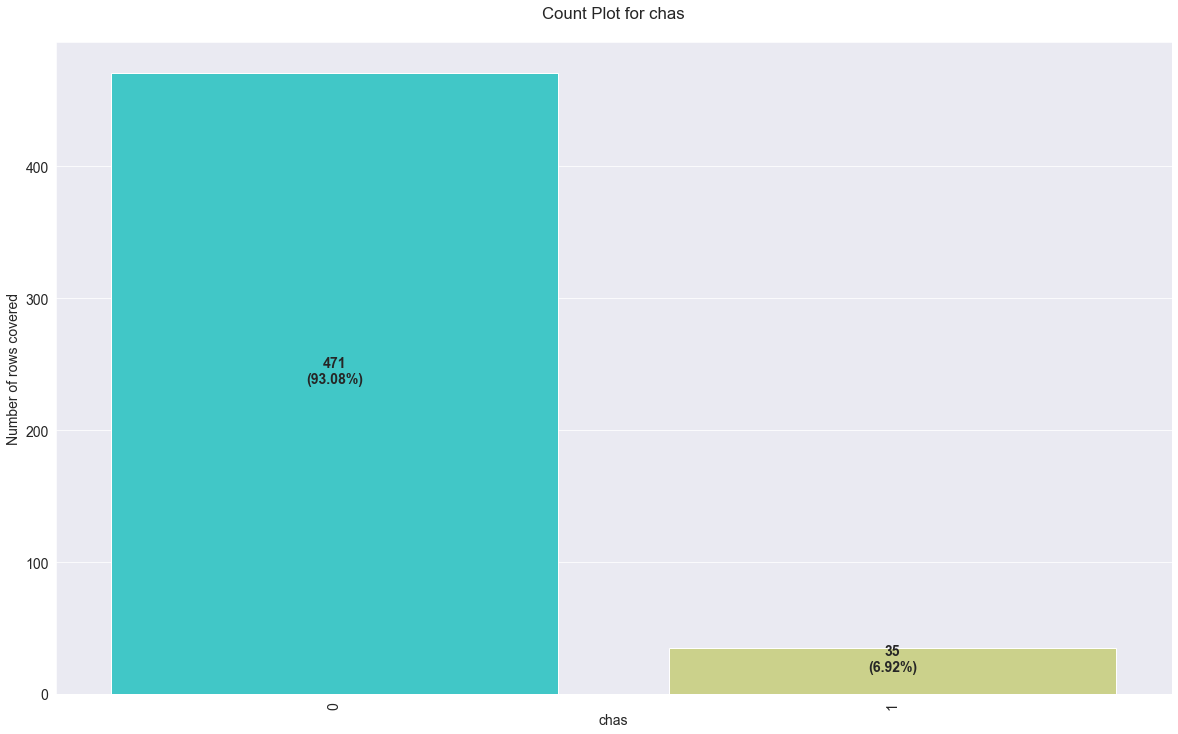

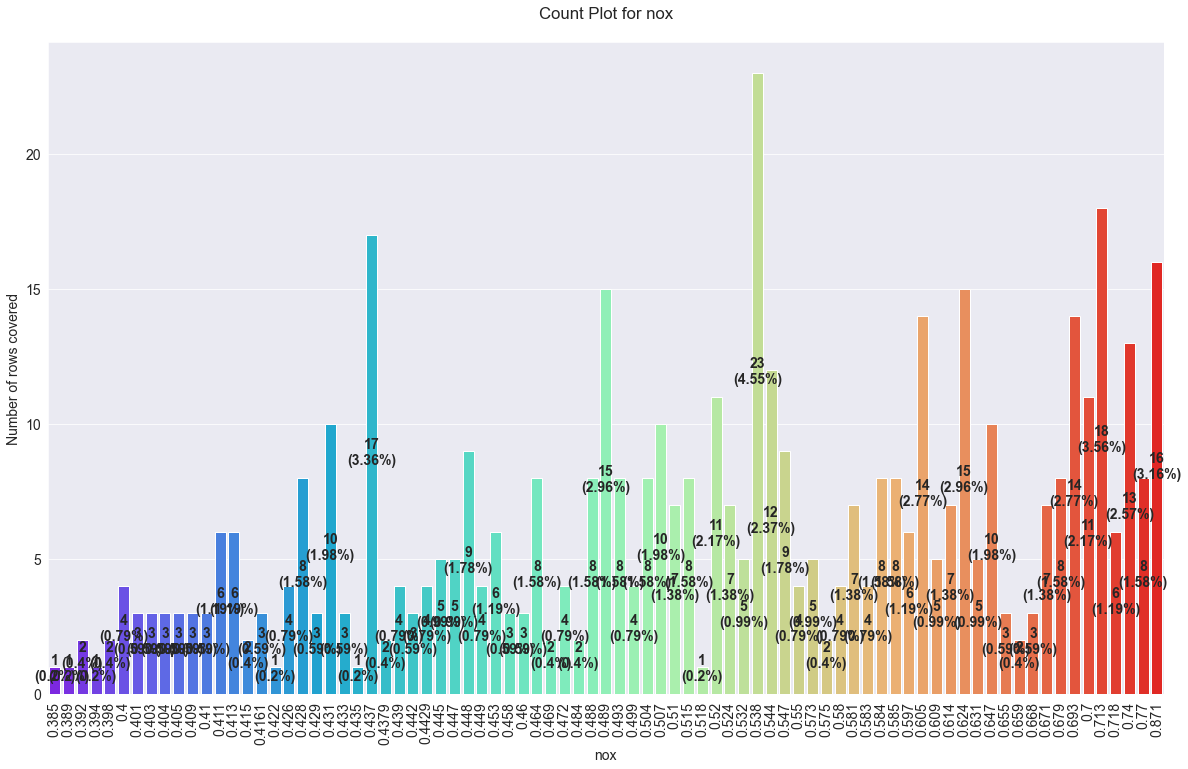

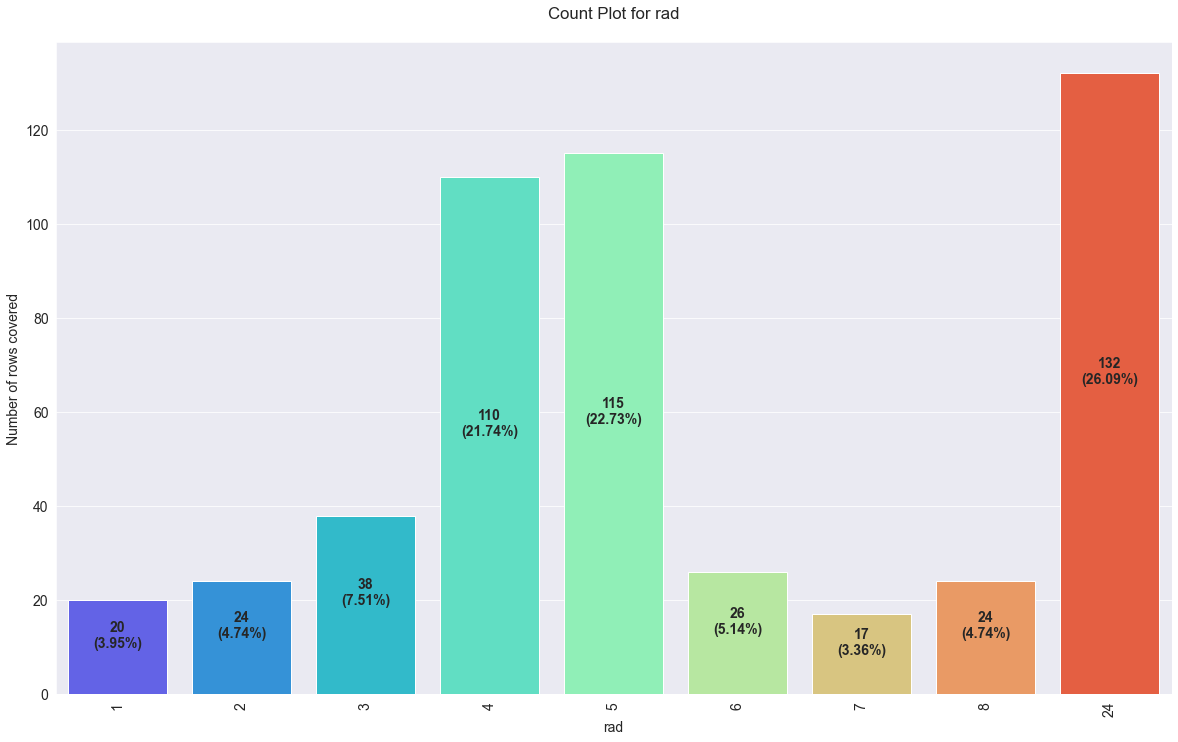

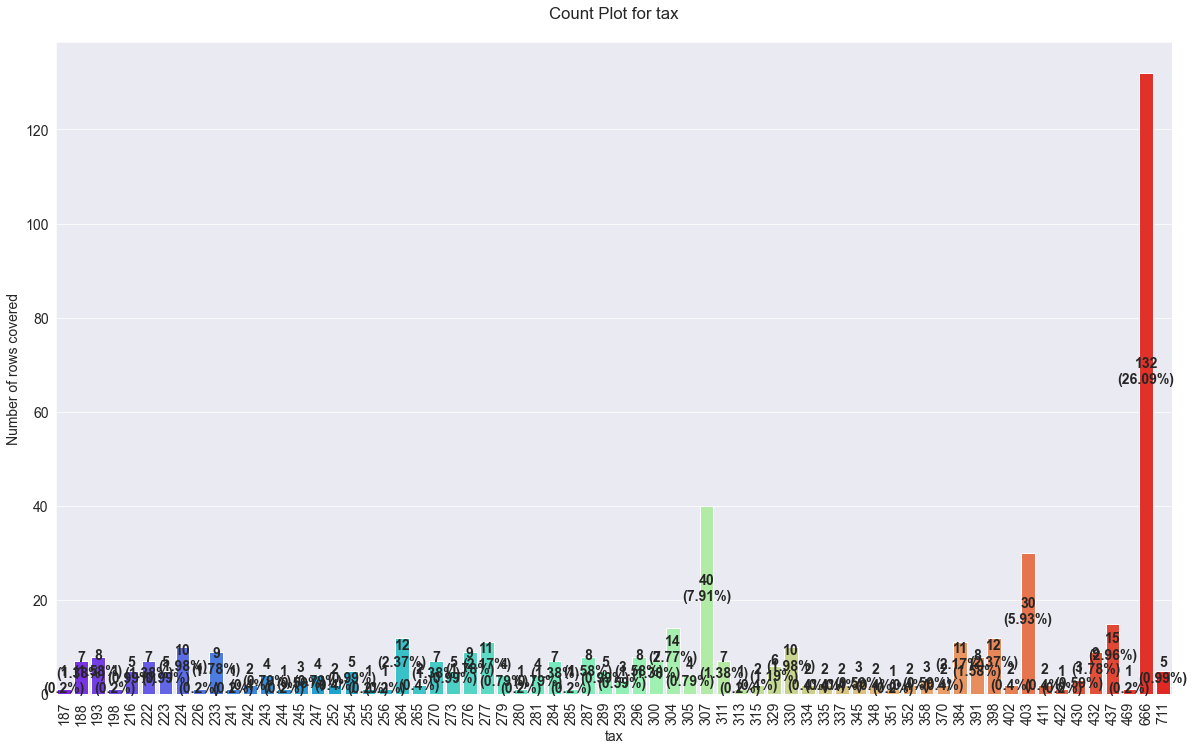

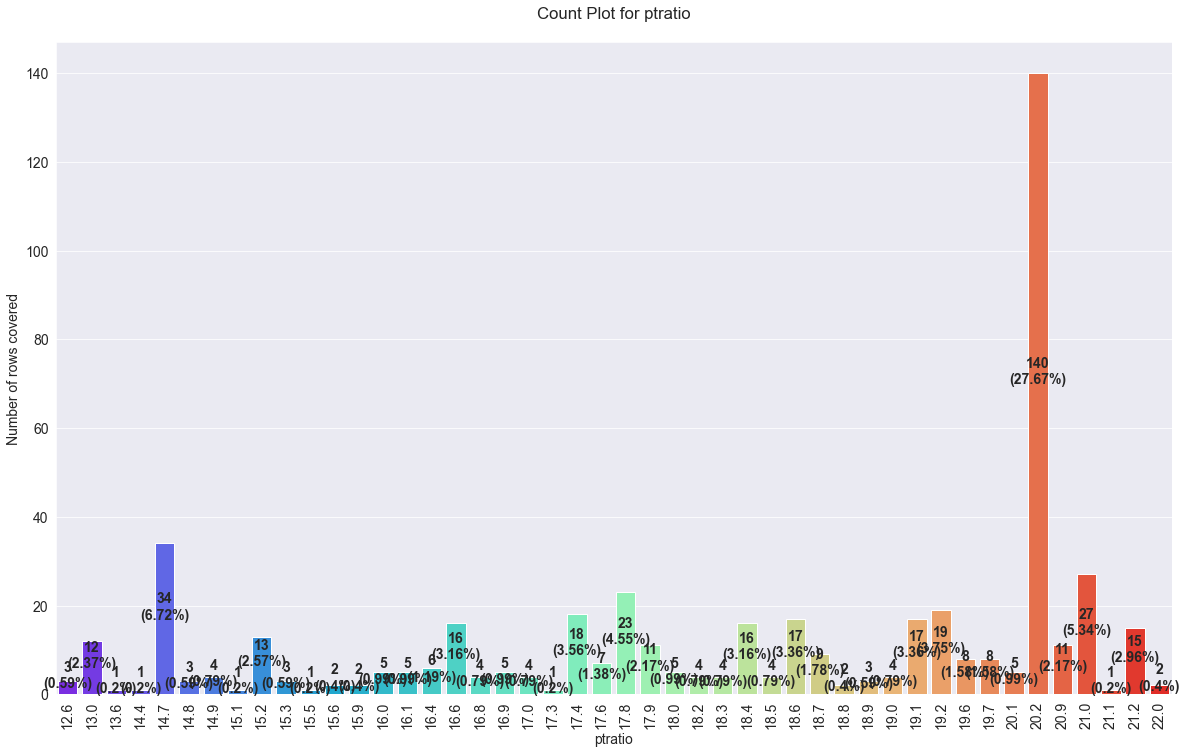

In [23]:
for col in df_columns:
    plt.figure(figsize=(20,12))
    col_name = col
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="rainbow")

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(df[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of rows covered")
    plt.xticks(rotation=90)
    plt.show()


1.proportion of non-retail business acres per town is nearly 18 most of the times.
2.index of accessibility to radial highways is 4,5 and 24 most of the times.
3.full-value property-tax rate per $10,000 is 666 most of the times.
4.pupil-teacher ratio by town is 20.2 most of the times.
5.Nox always high in range 0.538

# DATA PREPROCESSING AND FEATURE ENGINEERING

In [24]:
#find correlation co.efficient of all variables in table
df.corr()

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio     black     lstat     Price  
crim    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
black    0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
lstat   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

The most negatively correlated  with the target column(Price) is 'Lstat' column.The most positively correlated with the target column is 'rm' column.


Hence if rm(average number of rooms per dwelling) increases then the Price of house will also increase.
If Lstat(% lower status of the population) increases then the price of the house will get decreased.

## Visualize Correlation using Heatmap

<AxesSubplot:>

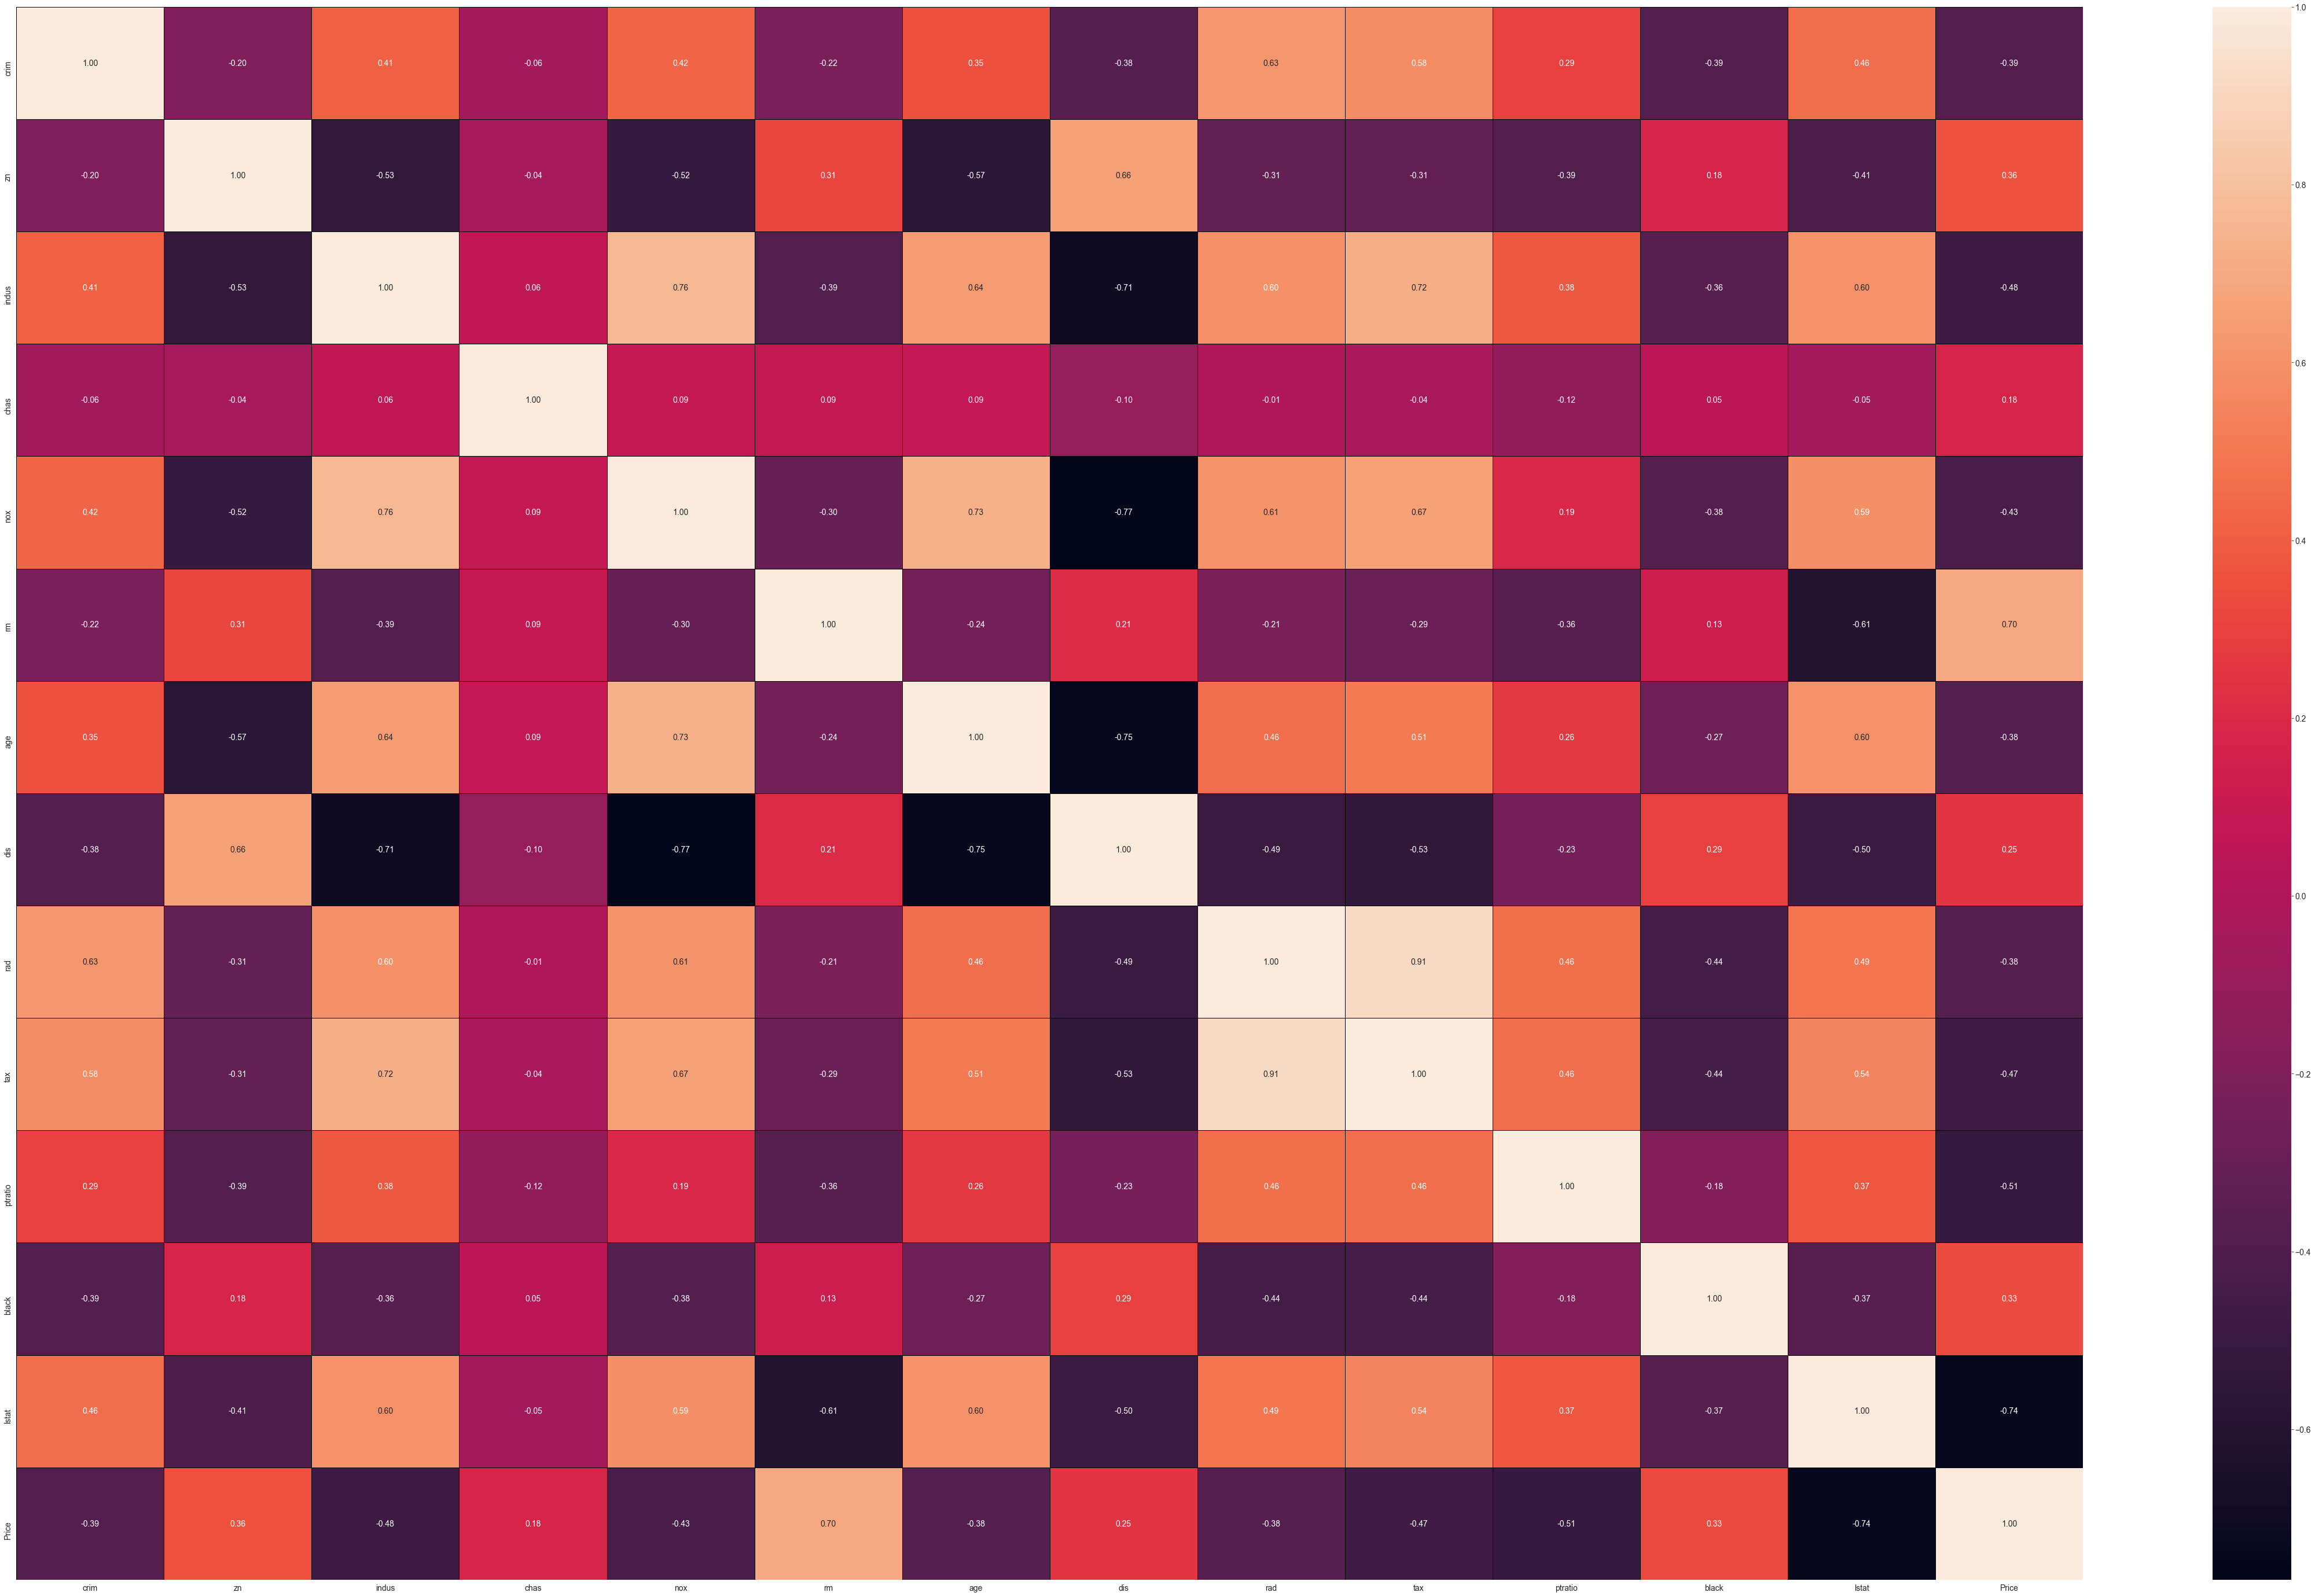

In [25]:
plt.figure(figsize=(80,50))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

In [26]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In some columns there is much difference between 75% and the max value.then there is much skewness present.

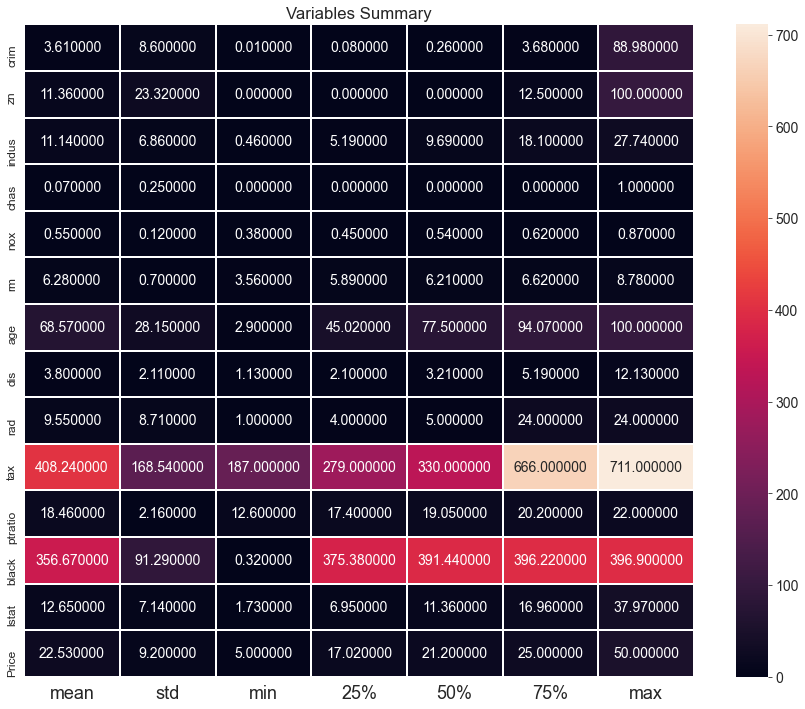

In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

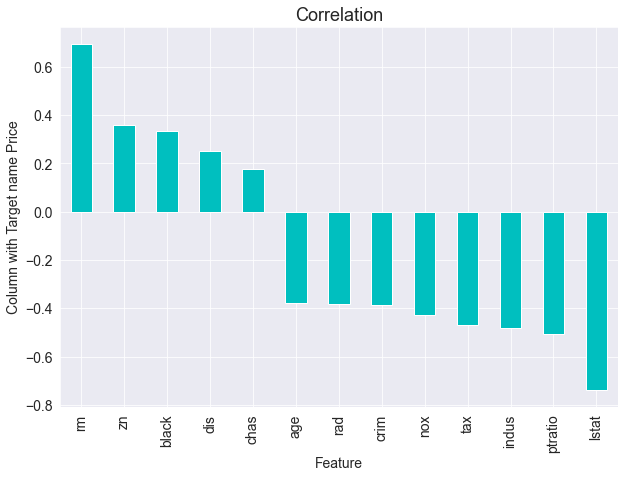

In [28]:
plt.figure(figsize=(10,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target name Price',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

This shows most positively and negatively correlated columns with the target column

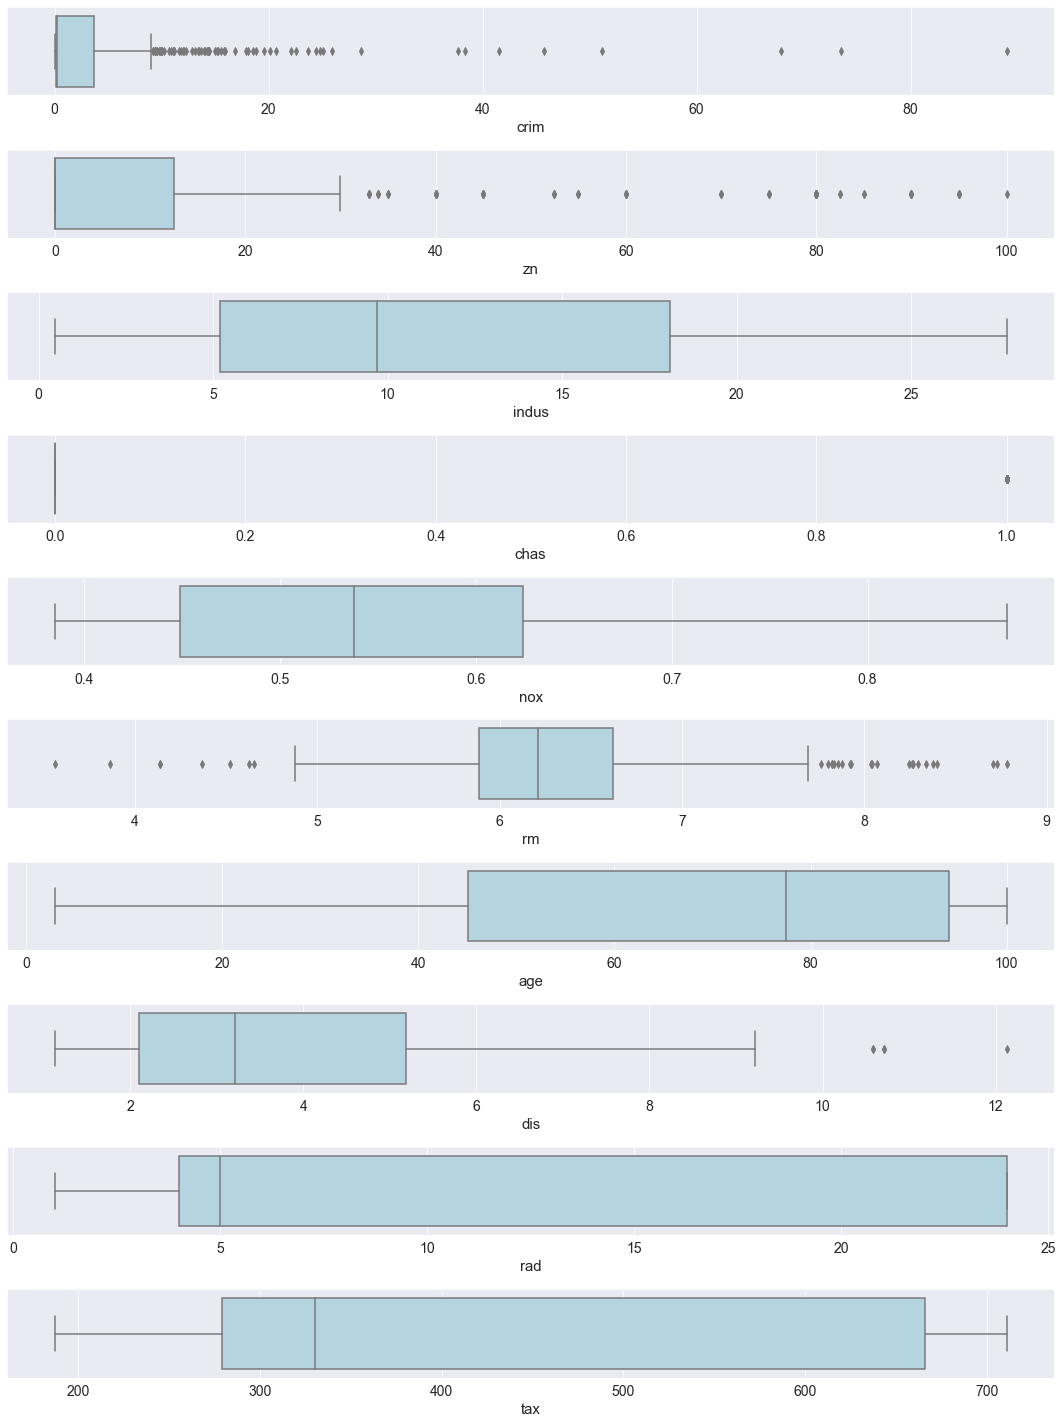

In [29]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in df.columns:
    if pltnum <=10:
        plt.subplot(10,1,pltnum)
        sns.boxplot(df[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

outliers present in crim,zn,rm and dis columns

In [30]:
#ckeck skewness
df.skew()
    

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
black     -2.890374
lstat      0.906460
Price      1.108098
dtype: float64

All columns except indus,rm,chas columns are having skewness.Features have Skewness when it is in outside the range of -0.5 to +0.5 value.

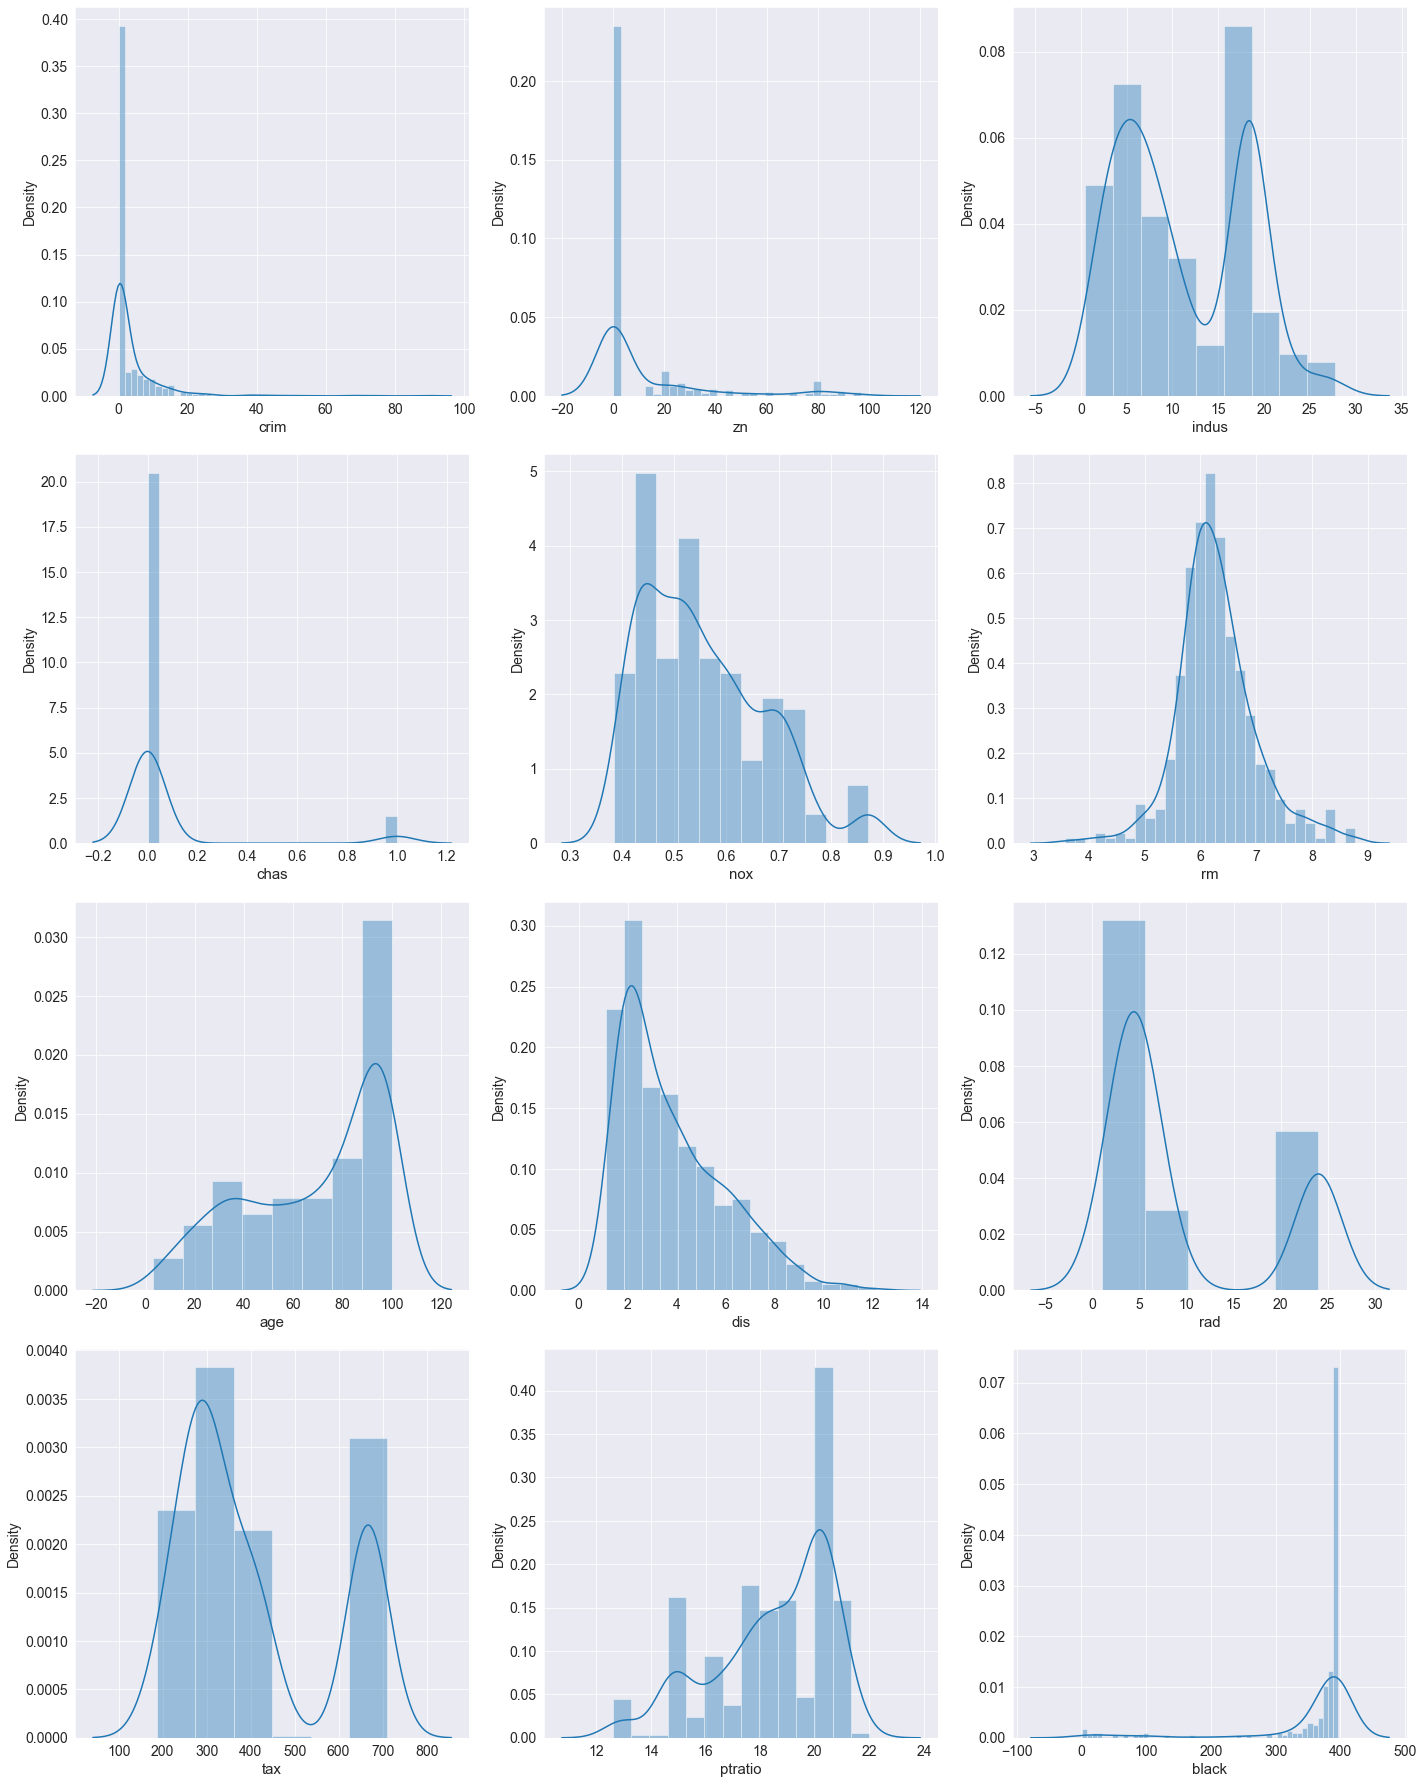

In [31]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

## Using Z-score to remove outliers

In [32]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(506, 14)

In [33]:
threshold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [34]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(506, 14)
(415, 14)


some outliers got removed

In [35]:
#finds data loss
loss_percent=(506-415)/(506*100)
print(loss_percent)

0.0017984189723320159


Data loss percentage is very low.data is cleaned now

In [36]:
df_new.shape

(415, 14)

This is new cleaned data set

## Skewness Removal and Scaling

In [37]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(df_new,method='yeo-johnson',standardize=False)
df_new

array([[ 6.27610136e-03,  9.77620829e-01,  1.38274879e+00, ...,
         4.90113116e+25,  2.09352038e+00,  4.20800653e+00],
       [ 2.65082036e-02, -0.00000000e+00,  2.69744400e+00, ...,
         4.90113116e+25,  2.84503277e+00,  4.04062259e+00],
       [ 2.64893608e-02, -0.00000000e+00,  2.69744400e+00, ...,
         4.40996841e+25,  1.86177333e+00,  4.82092383e+00],
       ...,
       [ 5.69249121e-02, -0.00000000e+00,  3.51283109e+00, ...,
         4.90113116e+25,  2.23714351e+00,  4.20130773e+00],
       [ 9.76992669e-02, -0.00000000e+00,  3.51283109e+00, ...,
         4.48179685e+25,  2.40373400e+00,  4.06952618e+00],
       [ 4.50432103e-02, -0.00000000e+00,  3.51283109e+00, ...,
         4.90113116e+25,  2.64974272e+00,  3.15823537e+00]])

In [38]:
df_for_model = pd.DataFrame(df_new) 

## Seggregate Data

In [39]:
#seggregate input data and output data
x=df_for_model.iloc[:,:-1]
y=df_for_model.iloc[:,-1]

### Scaling

In [40]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x= mmscaler.fit_transform(x)
x

array([[0.        , 0.95516548, 0.20895743, ..., 0.15329706, 1.        ,
        0.26988281],
       [0.02514441, 0.        , 0.48731066, ..., 0.40399817, 1.        ,
        0.47323227],
       [0.02512099, 0.        , 0.48731066, ..., 0.40399817, 0.89978583,
        0.20717508],
       ...,
       [0.06294623, 0.        , 0.65994812, ..., 0.95460667, 1.        ,
        0.30874536],
       [0.11362051, 0.        , 0.65994812, ..., 0.95460667, 0.91444131,
        0.35382257],
       [0.04817968, 0.        , 0.65994812, ..., 0.95460667, 1.        ,
        0.42038933]])

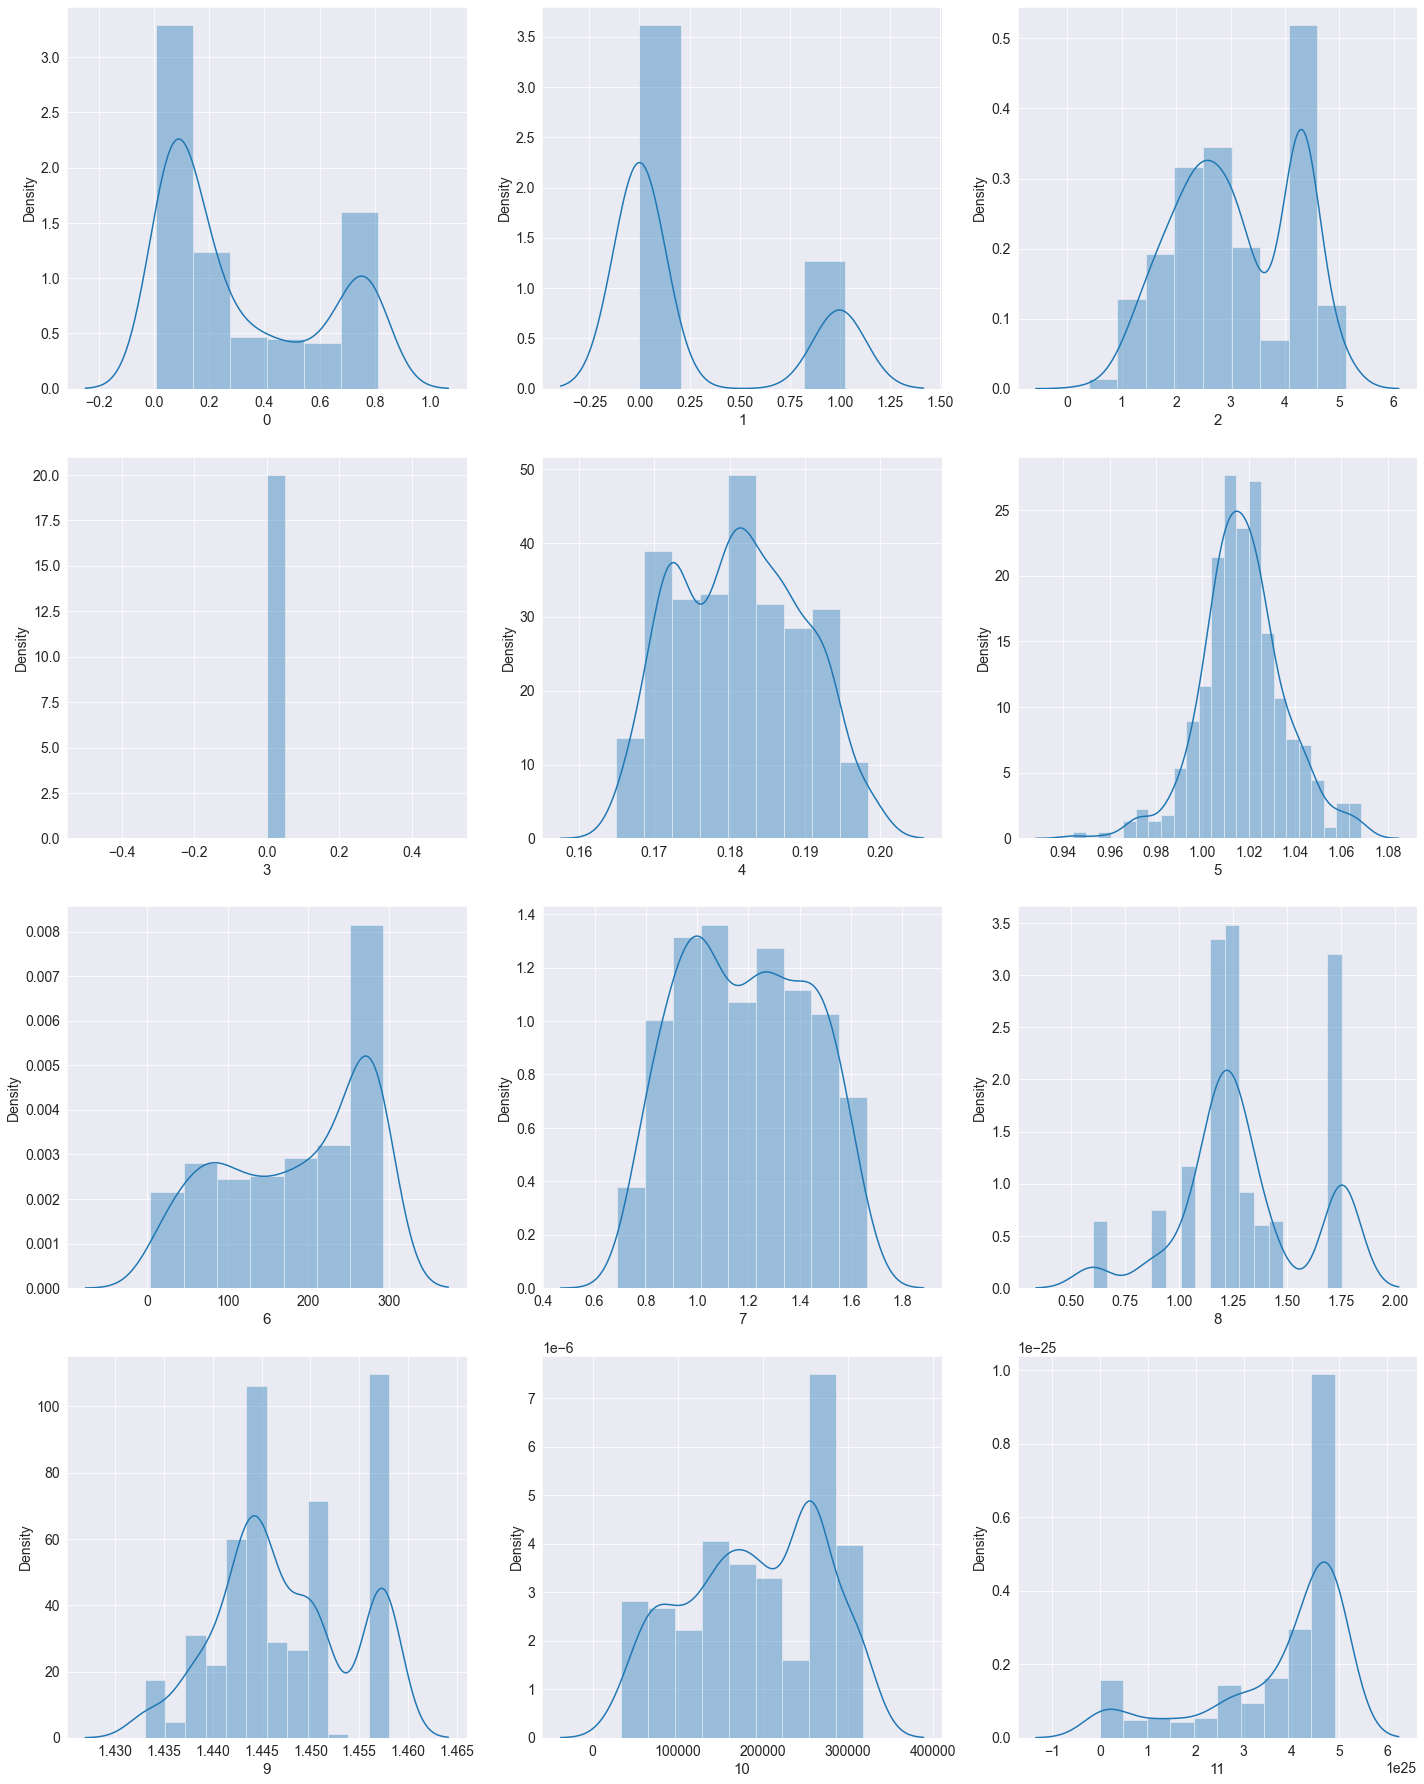

In [41]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df_for_model:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df_for_model[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Skewness removal and scaling done for better model performance

# MODEL EVALUATION

# REGRESSION :

# Linear Regression

In [42]:
#Linear Regression
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [43]:
#getting best accuracy with help of selecting random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.36,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)*100}")
    print(f"At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)*100}")
    print("\n")
    
    
    
    

At random state 0,the training accuracy is:79.20538999920727
At random state 0,the testing accuracy is:70.23818955535688


At random state 1,the training accuracy is:81.22191559107257
At random state 1,the testing accuracy is:66.29172069665036


At random state 2,the training accuracy is:76.0525273680497
At random state 2,the testing accuracy is:76.48864779321698


At random state 3,the training accuracy is:77.05453798357055
At random state 3,the testing accuracy is:73.16208039369995


At random state 4,the training accuracy is:77.6673010660076
At random state 4,the testing accuracy is:74.01841592884529


At random state 5,the training accuracy is:81.23311730865034
At random state 5,the testing accuracy is:68.00476234997035


At random state 6,the training accuracy is:75.88498895308575
At random state 6,the testing accuracy is:75.37741267497113


At random state 7,the training accuracy is:78.03022271978146
At random state 7,the testing accuracy is:73.35855495974768


At random state 8,

In [44]:
#evaluation metrics

print("Accuracy:", r2_score(y_test,pred_test)*100)

Accuracy: 69.95002411202536


In [45]:
#cross validation at random state
Train_accuracy=(r2_score(y_train,pred_train)*100)
Test_accuracy=r2_score(y_test,pred_test)*100
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_test,y_test,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for Training is {Train_accuracy} and accuracy score for Testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is 59.44255966552726 and accuracy score for Training is 78.50026045996424 and accuracy score for Testing is 69.95002411202536


At cross fold 3 the cv score is 62.54375835624324 and accuracy score for Training is 78.50026045996424 and accuracy score for Testing is 69.95002411202536


At cross fold 4 the cv score is 65.27415744164229 and accuracy score for Training is 78.50026045996424 and accuracy score for Testing is 69.95002411202536


At cross fold 5 the cv score is 65.37140604228432 and accuracy score for Training is 78.50026045996424 and accuracy score for Testing is 69.95002411202536


At cross fold 6 the cv score is 61.80933061452151 and accuracy score for Training is 78.50026045996424 and accuracy score for Testing is 69.95002411202536


At cross fold 7 the cv score is 63.90176542913437 and accuracy score for Training is 78.50026045996424 and accuracy score for Testing is 69.95002411202536


At cross fold 8 the cv score is 60.63889667697917 and accu

# Hyper parameter Tuning

In [46]:
#perform gridsearchcv and cross val score on LinearRegression
from sklearn.model_selection import GridSearchCV

parameters={ 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False], 'n_jobs':[None,1,-1], 'positive':[True,False]}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [47]:
lr=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, normalize= False, positive= False)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 69.95002411202536
score of model is: 78.50026045996424


In [48]:
cv_score_lr=cross_val_score(lr,x_test,y_test,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 65.37140604228432


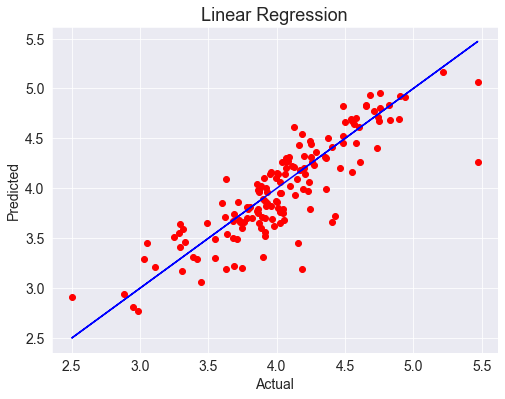

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [50]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))
print("r2_score is",r2_score(y_test,pred_test)*100)

mean absolute error 0.1954696354916872
mean squared error 0.07105075948154142
Root mean squared error 0.2665534833416015
r2_score is 69.95002411202536


# LASSO REGRESSION

# parameter tuning

In [51]:
#perform gridsearchcv and cross val score on lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.001, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [52]:
ls=Lasso(alpha=0.001,random_state=0,fit_intercept= True, normalize= False,tol= 0.001)
ls.fit(x_train,y_train)
pred_test_ls=ls.predict(x_test)
pred_train_ls=ls.predict(x_train)
ls_score = ls.score(x_train,y_train)
ls_acc_score=r2_score(y_test,pred_test_ls)
print("Accuracy score is:",ls_acc_score*100)


Accuracy score is: 69.81466175141729


In [53]:
#checks cv score
for u in range(2,10):
    cv_score_ls=cross_val_score(ls,x,y,cv=5)
    cv_mean_ls=cv_score_ls.mean()
    print("At cv :-",j )
    print("cv_score is:",cv_mean_ls*100)
    print("accuracy score---r2_score is",ls_acc_score*100)

At cv :- 9
cv_score is: 55.385862027597554
accuracy score---r2_score is 69.81466175141729
At cv :- 9
cv_score is: 55.385862027597554
accuracy score---r2_score is 69.81466175141729
At cv :- 9
cv_score is: 55.385862027597554
accuracy score---r2_score is 69.81466175141729
At cv :- 9
cv_score is: 55.385862027597554
accuracy score---r2_score is 69.81466175141729
At cv :- 9
cv_score is: 55.385862027597554
accuracy score---r2_score is 69.81466175141729
At cv :- 9
cv_score is: 55.385862027597554
accuracy score---r2_score is 69.81466175141729
At cv :- 9
cv_score is: 55.385862027597554
accuracy score---r2_score is 69.81466175141729
At cv :- 9
cv_score is: 55.385862027597554
accuracy score---r2_score is 69.81466175141729


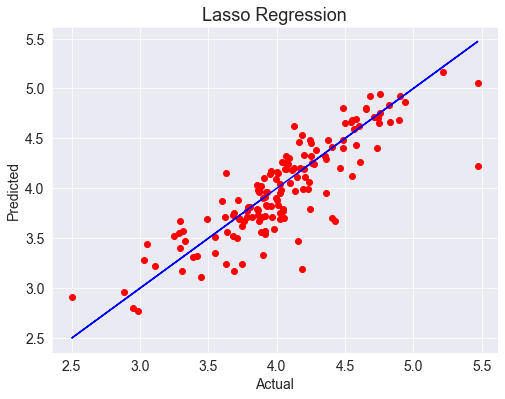

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [55]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_ls))
print("mean squared error",mean_squared_error(y_test,pred_test_ls))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print("r2_score is",r2_score(y_test,pred_test_ls)*100)

mean absolute error 0.19317834046822174
mean squared error 0.07137081293390596
Root mean squared error 0.26715316381039916
r2_score is 69.81466175141729


# RANDOM FOREST REGRESSION

# parameter tuning

In [56]:
#perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['squared_error', 'mse','absolute_error'],'max_features':["auto","sqrt"],'bootstrap': [True, False],'min_samples_split':[1,2],'min_samples_leaf':[1,2]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                                                      


{'bootstrap': False, 'criterion': 'absolute_error', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [57]:
rf=RandomForestRegressor(criterion="absolute_error",max_features="sqrt",bootstrap= False,min_samples_leaf= 1, min_samples_split= 2)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 69.95002411202536
score of model is: 100.0


In [58]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 63.58490437266011


In [59]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rf))
print("mean squared error",mean_squared_error(y_test,pred_test_rf))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("r2_score is",r2_score(y_test,pred_test_rf)*100)

mean absolute error 0.152089450728354
mean squared error 0.05053889637640485
Root mean squared error 0.22480857718602476
r2_score is 78.62524442247008


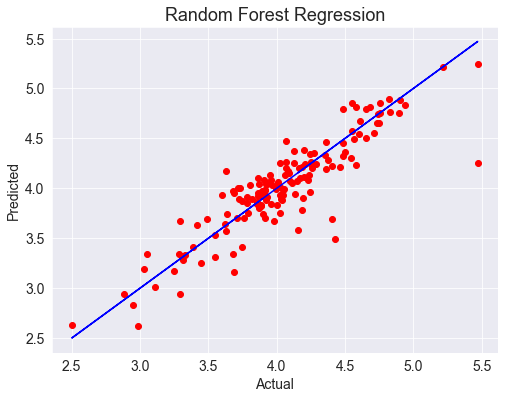

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

# RIDGE REGRESSION

In [61]:
#perform gridsearchcv and cross val score on Ridge Regressor
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [62]:
rd=Ridge(alpha=0.01,fit_intercept=True,normalize=True,random_state=0,tol=0.001)
rd.fit(x_train,y_train)
pred_test_rd=rd.predict(x_test)
pred_train_rd=rd.predict(x_train)
rd_score = rd.score(x_train,y_train)
rd_acc_score=r2_score(y_test,pred_test_rd)
print("Accuracy score is:",rd_acc_score*100)
print("score of model is:",rd_score*100)

Accuracy score is: 70.07908283601762
score of model is: 78.48925094481093


In [63]:
cv_score_rd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cv_score_rd.mean()
print("cv_mean is:",cv_mean_rd*100)

cv_mean is: 55.24204992521222


In [64]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rd))
print("mean squared error",mean_squared_error(y_test,pred_test_rd))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print("r2_score is",r2_score(y_test,pred_test_rd)*100)

mean absolute error 0.19429712044833233
mean squared error 0.0707456104727185
Root mean squared error 0.26598047009643117
r2_score is 70.07908283601762


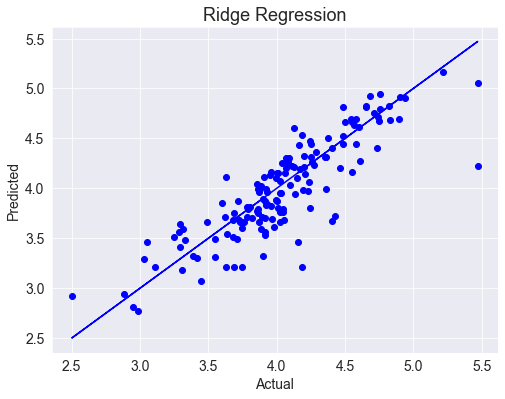

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# DECISION TREE REGRESSOR

In [66]:
#perform gridsearchcv and cross val score on Decison Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                  

{'criterion': 'mse', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'random_state': 0, 'splitter': 'best'}


In [67]:
dt=DecisionTreeRegressor(criterion='mse',max_features= 'auto', min_weight_fraction_leaf= 0.1, random_state= 0, splitter= 'best')
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=r2_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)


Accuracy score is: 47.17227955286295
score of model is: 78.8443349729491


In [68]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 37.41740150757934


In [69]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_dt))
print("mean squared error",mean_squared_error(y_test,pred_test_dt))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_dt)))
print("r2_score is",r2_score(y_test,pred_test_dt)*100)

mean absolute error 0.2453923682023624
mean squared error 0.1249069108554491
Root mean squared error 0.35342171814342294
r2_score is 47.17227955286295


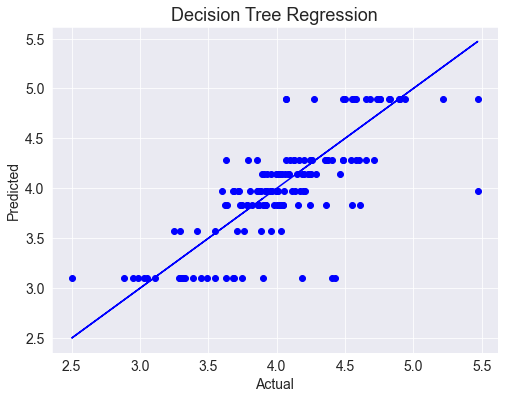

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_dt,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# GRADIENT BOOSTING REGRESSOR

In [71]:
#perform gridsearchcv and cross val score on  GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100],'criterion':['friedman_mse','mse'],'learning_rate':[0.05],'max_depth' : [1,3,5,7,9,11,12],'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 9, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}


In [72]:

gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=100,learning_rate= 0.05,max_depth= 9, min_weight_fraction_leaf= 0.1)
gbr.fit(x_train,y_train)
pred_test_gbr=gbr.predict(x_test)
pred_train_gbr=gbr.predict(x_train)
gbr_score = gbr.score(x_train,y_train)
gbr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",gbr_acc_score*100)
print("score of model is:",gbr_score*100)

Accuracy score is: 69.95002411202536
score of model is: 91.36856683226527


In [73]:
cv_score_gbr=cross_val_score(gbr,x,y,cv=5)
cv_mean_gbr=cv_score_gbr.mean()
print("cv_mean is:",cv_mean_gbr*100)

cv_mean is: 62.16544550834211


In [74]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_gbr))
print("mean squared error",mean_squared_error(y_test,pred_test_gbr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_gbr)))
print("r2_score is",r2_score(y_test,pred_test_gbr)*100)

mean absolute error 0.1776586803958489
mean squared error 0.0667793858547807
Root mean squared error 0.25841707732806807
r2_score is 71.75654490686692


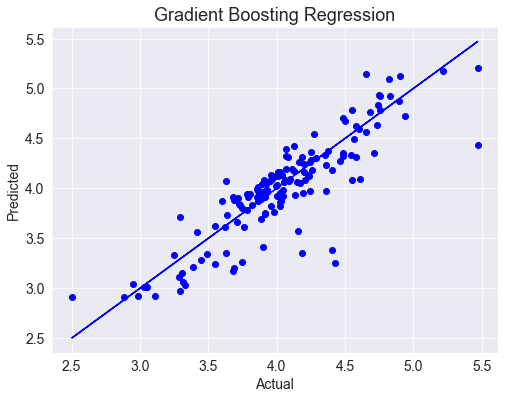

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gbr,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

# SUPPORT VECTOR REGRESSOR

In [76]:
#perform gridsearchcv and cross val score on Support Vector Regressor
from sklearn.svm import SVR
parameters ={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale', 'auto'],'tol':[0.01,0.0001,0.001],'shrinking':[True,False],'degree':[3,4,5],'max_iter':[1,2,-1]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.01}


In [77]:
sv=SVR(kernel='poly',gamma='scale',degree= 3, max_iter= -1, shrinking= True, tol= 0.01)
sv.fit(x_train,y_train)
pred_test_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
sv_score = sv.score(x_train,y_train)
sv_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",sv_acc_score*100)
print("score of model is:",sv_score*100)

Accuracy score is: 69.95002411202536
score of model is: 91.81045647658489


In [78]:
cv_score_sv=cross_val_score(sv,x,y,cv=5)
cv_mean_sv=cv_score_sv.mean()
print("cv_mean is:",cv_mean_sv*100)

cv_mean is: 46.659991888683905


In [79]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_sv))
print("mean squared error",mean_squared_error(y_test,pred_test_sv))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_sv)))
print("r2_score is",r2_score(y_test,pred_test_sv)*100)

mean absolute error 0.14520229400892554
mean squared error 0.043599298694073994
Root mean squared error 0.20880445084833318
r2_score is 81.56025517461359


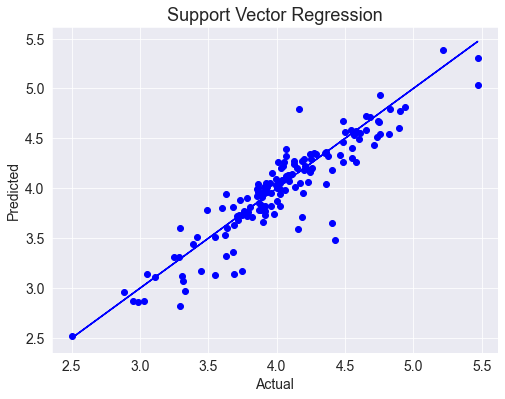

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_sv,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

# ELASTIC NET REGRESSION(COMBINATION OF L1 AND L2)

In [81]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
enr=ElasticNet()
clf=GridSearchCV(enr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [82]:
enr=ElasticNet(alpha=0.0001,fit_intercept= True,normalize= True, random_state= 0, tol= 0.001)
enr.fit(x_train,y_train)
pred_test_enr=enr.predict(x_test)
pred_train_enr=enr.predict(x_train)
enr_score = enr.score(x_train,y_train)
enr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",enr_acc_score*100)
print("score of model is:",enr_score*100)

Accuracy score is: 69.95002411202536
score of model is: 78.46375225743948


In [83]:
cv_score_enr=cross_val_score(enr,x,y,cv=5)
cv_mean_enr=cv_score_enr.mean()
print("cv_mean is:",cv_mean_enr*100)

cv_mean is: 55.79879263876193


In [84]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_enr))
print("mean squared error",mean_squared_error(y_test,pred_test_enr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_enr)))
print("r2_score is",r2_score(y_test,pred_test_enr)*100)

mean absolute error 0.19345160033146824
mean squared error 0.07076372886980269
Root mean squared error 0.26601452755404675
r2_score is 70.07141990039973


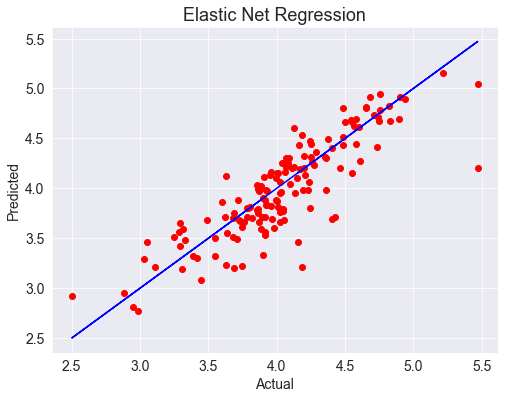

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_enr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Elastic Net Regression',fontsize=18)
plt.show()

# CONCLUSION

## OUTPUT
 


In [86]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rd.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


Original  Predicted
0    3.897159   3.895150
1    3.865554   3.752434
2    4.405274   3.674252
3    4.273785   4.229189
4    4.941358   4.906085
5    3.873504   3.967120
6    3.857571   3.773085
7    4.187842   4.537673
8    4.734913   4.407308
9    4.003882   4.157400
10   3.325168   3.477508
11   4.349969   4.312463
12   3.996451   3.878678
13   4.069526   4.206218
14   4.146888   4.098456
15   4.126088   4.217214
16   4.755471   4.946834
17   3.817150   3.701717
18   3.681735   3.685192
19   4.098010   4.030650
20   4.579469   4.698668
21   4.187842   3.213378
22   4.069526   4.267492
23   3.857571   4.039651
24   3.282137   3.560169
25   3.628350   4.109007
26   3.303780   3.183692
27   4.247733   4.445262
28   5.470468   5.050128
29   5.217807   5.160072
30   4.033330   3.953783
31   3.873504   3.661406
32   3.889306   3.709352
33   3.448493   3.069736
34   2.881119   2.945902
35   4.167471   4.190353
36   3.690487   3.747863
37   4.026009   3.762491
38   3.912770   3.707248
39   3.601079   3.854362
40   4.465006   4.206114
41   4.160633   4.432006
42   4.362390   4.310282
43   4.820924   4.826709
44   4.708928   4.752613
45   4.208007   4.139447
46   4.429378   3.722755
47   3.487831   3.665999
48   4.234579   4.062364
49   4.260801   4.266659
50   4.003882   3.870382
51   4.482589   4.448359
52   4.500021   4.662267
53   4.745217   4.677966
54   3.920528   3.832738
55   4.405274   4.408290
56   3.912770   3.528289
57   3.784188   3.809392
58   3.628350   3.213501
59   3.545315   3.311346
60   3.784188   3.710812
61   3.619304   3.713593
62   4.201308   4.210198
63   3.387867   3.321036
64   4.579469   4.448445
65   3.792482   3.796501
66   4.655966   4.816669
67   4.903559   4.918228
68   3.249181   3.513755
69   3.996451   4.103711
70   4.241167   4.473148
71   4.488416   4.810080
72   4.540129   4.690204
73   3.865554   3.990234
74   3.716504   3.874410
75   4.112099   4.218375
76   4.655966   4.821417
77   3.958860   4.161168
78   3.314505   3.593787
79   3.110972   3.214337
80   3.742169   3.215950
81   4.830815   4.678950
82   3.912770   3.876564
83   3.951254   4.136901
84   4.011286   3.806654
85   2.500732   2.918215
86   4.241167   3.800630
87   3.920528   3.994895
88   3.958860   3.824945
89   4.568306   4.633492
90   3.865554   3.793554
91   3.904980   4.112584
92   3.025113   3.293172
93   4.551446   4.667702
94   4.482589   4.519017
95   4.201308   4.322326
96   3.725097   3.683243
97   4.551446   4.166771
98   3.418430   3.299016
99   3.928256   3.843904
100  4.601616   4.612764
101  4.083820   4.264429
102  4.090928   4.305967
103  4.133046   3.939872
104  3.742169   3.606856
105  3.690487   3.215644
106  3.912770   3.561145
107  4.682616   4.921708
108  4.055128   3.682926
109  4.026009   3.950951
110  4.194586   3.987733
111  3.292991   3.644622
112  4.040623   4.256387
113  3.733652   3.665203
114  4.362390   3.991390
115  2.948042   2.808714
116  4.047889   3.766142
117  4.026009   4.068932
118  3.897159   3.324931
119  3.966437   3.693962
120  3.050071   3.459901
121  4.286684   4.364840
122  4.011286   4.150297
123  3.981502   3.610342
124  4.026009   3.657826
125  3.881421   4.020017
126  5.470468   4.225904
127  2.987000   2.766457
128  4.894003   4.694951
129  3.928256   3.967216
130  3.292991   3.416699
131  4.227969   3.973700
132  4.047889   3.794874
133  4.740072   4.713579
134  3.545315   3.493693
135  4.254278   4.316235
136  4.755471   4.795959
137  4.062340   4.148170
138  4.126088   4.606278
139  4.374736   4.502721
140  3.800740   3.814734
141  3.759088   3.660757
142  4.612601   4.270833
143  3.881421   3.596945
144  3.681735   3.507796
145  3.873504   3.982481
146  3.707871   3.492018
147  4.069526   4.299247
148  3.637353   3.544272
149  4.153773   3.461971

In [87]:
import pickle
filename='BOSTON_HOUSE_SALES_PRICE _PREDICTION__rd.pkl'
pickle.dump(rd,open(filename,'wb'))


In [88]:
models=['Linear Regression','Lasso regression','RandomForestRegressor','Ridge Regressor','Decison Tree Regressor','GradientBoostingRegressor'
,'Support Vector Regressor','ElasticNet Regression']
        


In [89]:
scores=[ r2_score(y_test,pred_test)*100,ls_acc_score*100,rf_acc_score*100,rd_acc_score*100,dt_acc_score*100,gbr_acc_score*100,sv_acc_score*100,enr_acc_score*100]
scores

[69.95002411202536,
 69.81466175141729,
 69.95002411202536,
 70.07908283601762,
 47.17227955286295,
 69.95002411202536,
 69.95002411202536,
 69.95002411202536]

In [90]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8]

In [91]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.sort_values(by='Scores', ascending=False).style.hide_index()

## CONCLUSION

From the above models,Ridge Regressor performs well,Because Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

This is our Best Fit Model.So we save this model for our analysis

## KEY FINDINGS

The Price of the Boston Area Houses are mainly depends on Factors like rooms,Lower status of population,Zone,Black people,Pupil teacher ratio etc.,
and Crime rate is always low everywhere 

In [92]:
df_con.to_csv("BOSTON_HOUSE_SALES_PRICE _PREDICTION_rd.csv",sep='\t')

# Prediction for Nitrogen Oxide Level in Boston

In [93]:
df1=df.copy()

In [94]:
df1.shape

(506, 14)

In [95]:
v=df1[list(df1.columns)[4]] 
df1=df1.drop(['nox'],axis=1) 


In [96]:
df1.insert(13,'nox',v) 

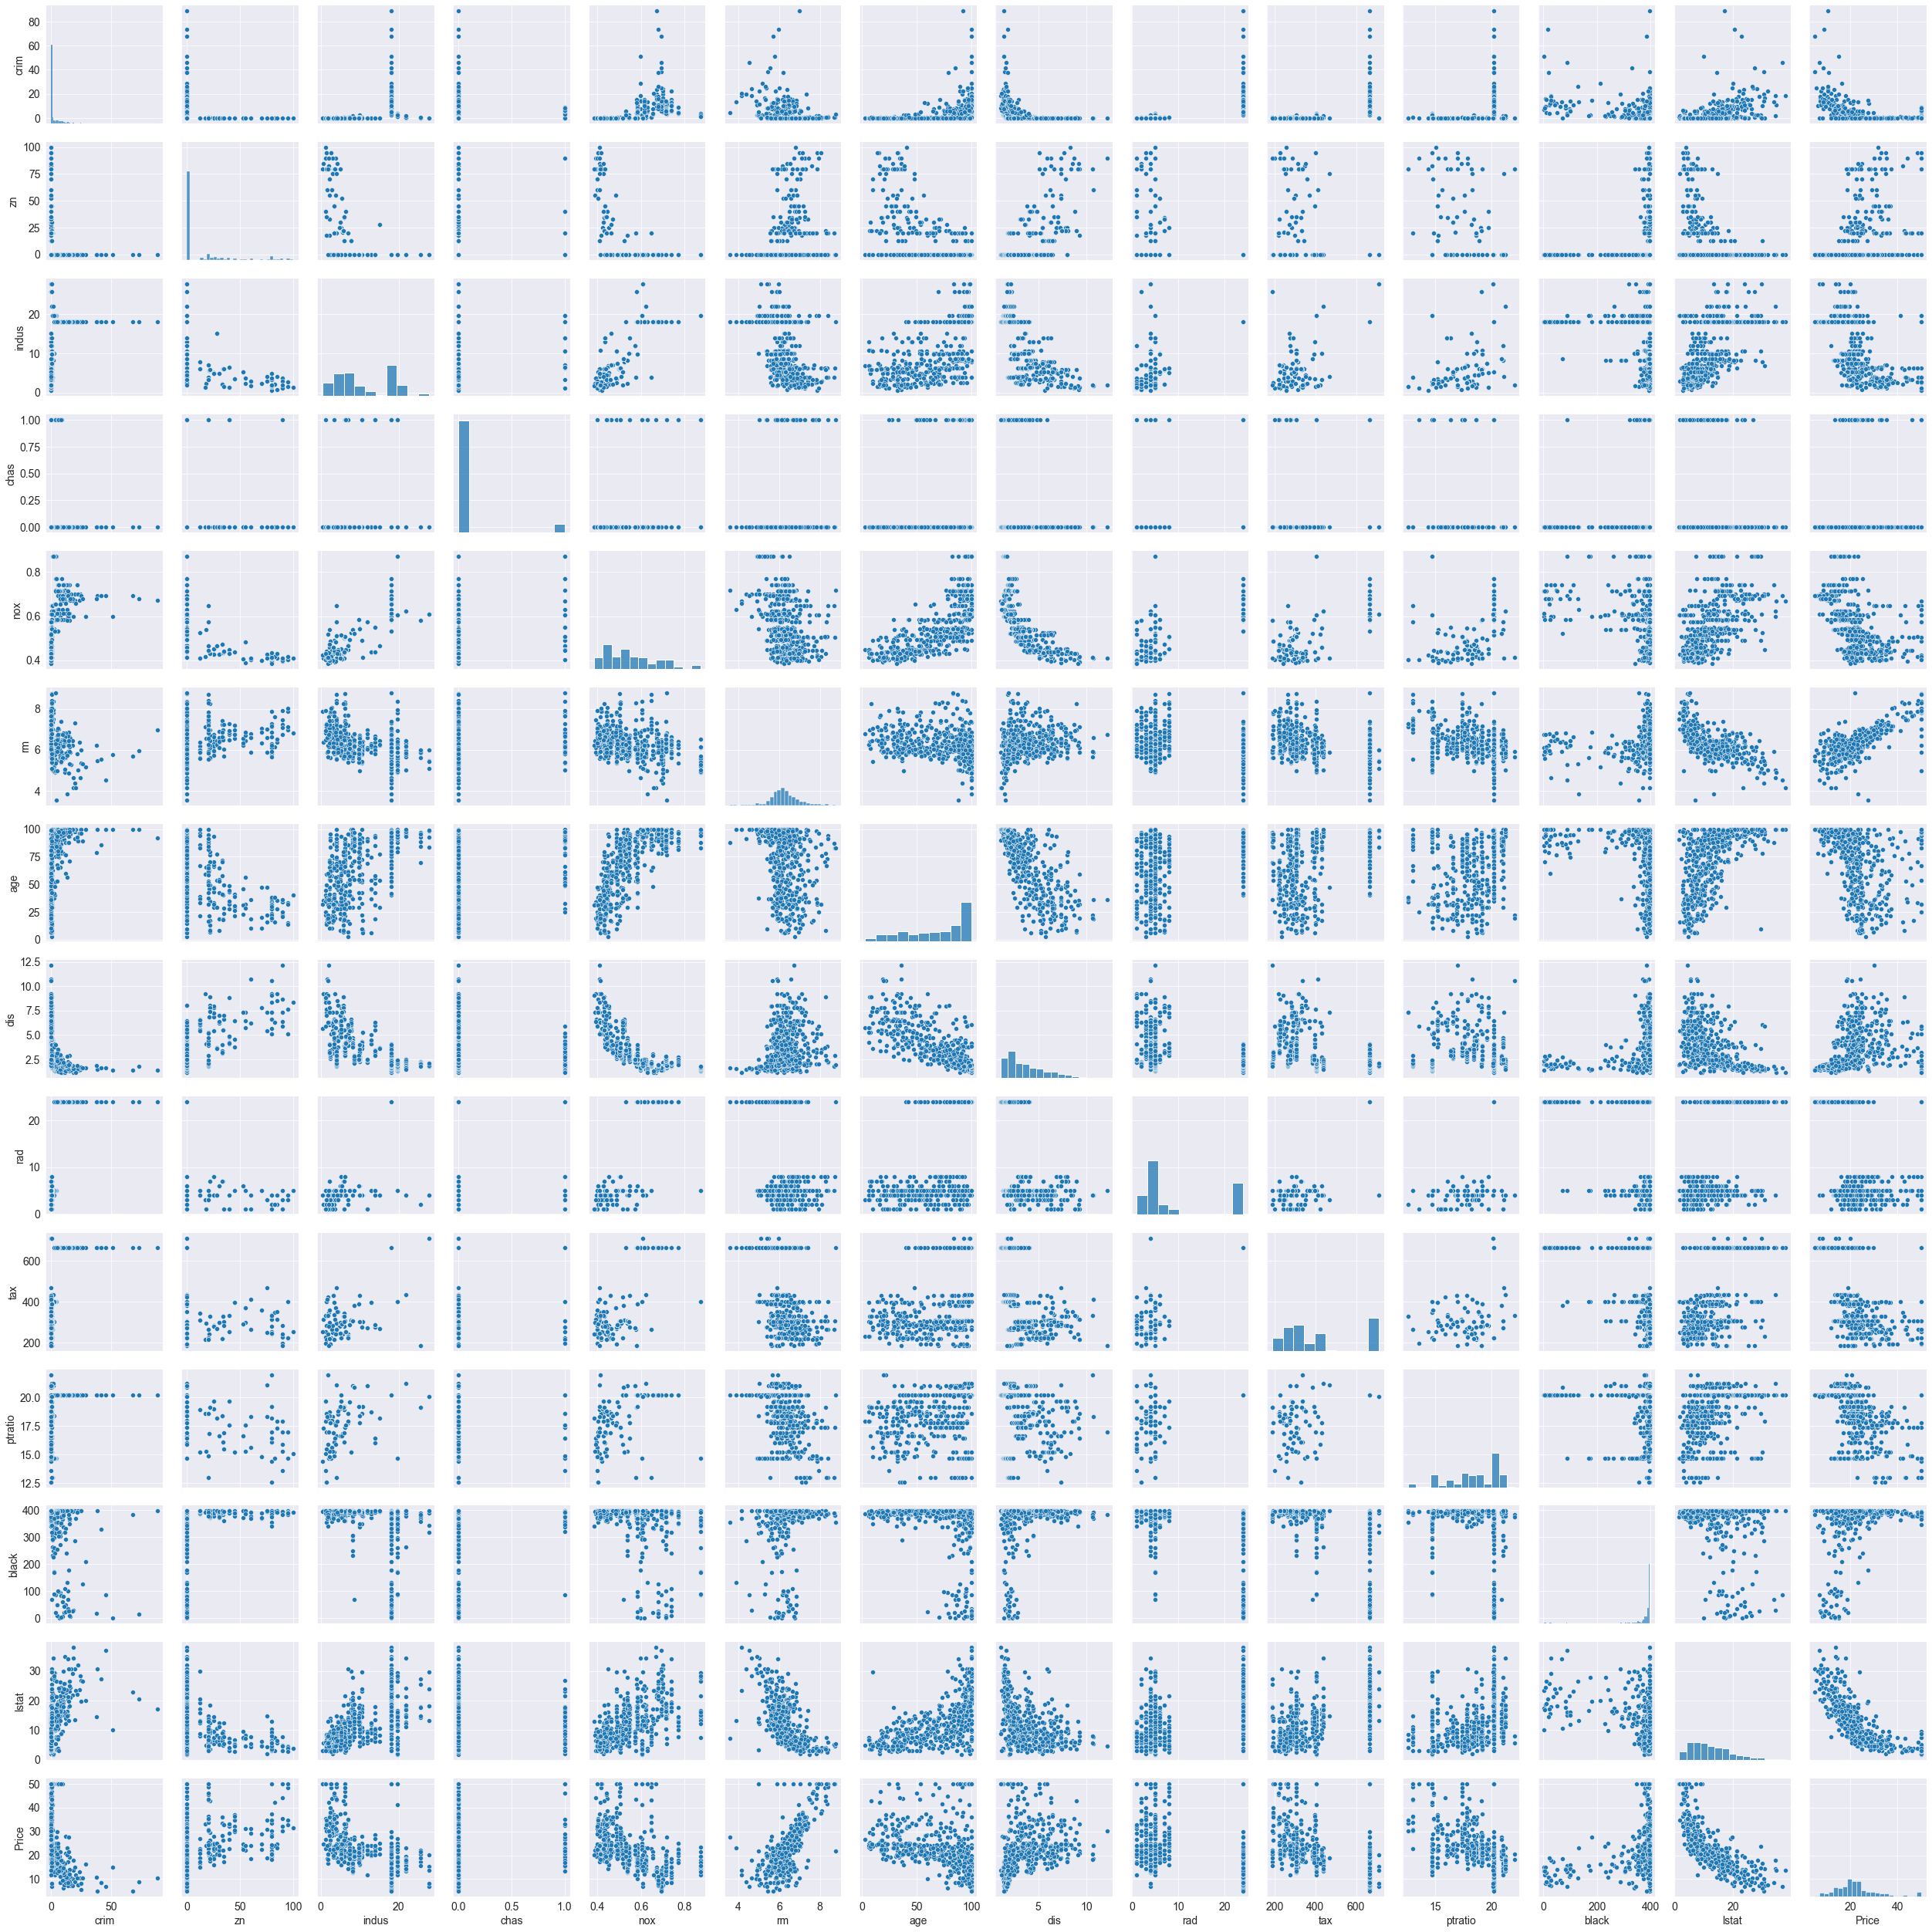

In [97]:
sns.pairplot(df)
plt.tight_layout()

1.nox increases if proportion of non-retail business acres per town(indus) increases.
2.nox increases when tract bounds river(chas)
3.If weighted distances to five Boston employment centres increases then Nox decreases
4.nox increases if lower status of the population increases
5.nox decreases if building price increases

Nox  high in range 0.538 most of the times.

<AxesSubplot:>

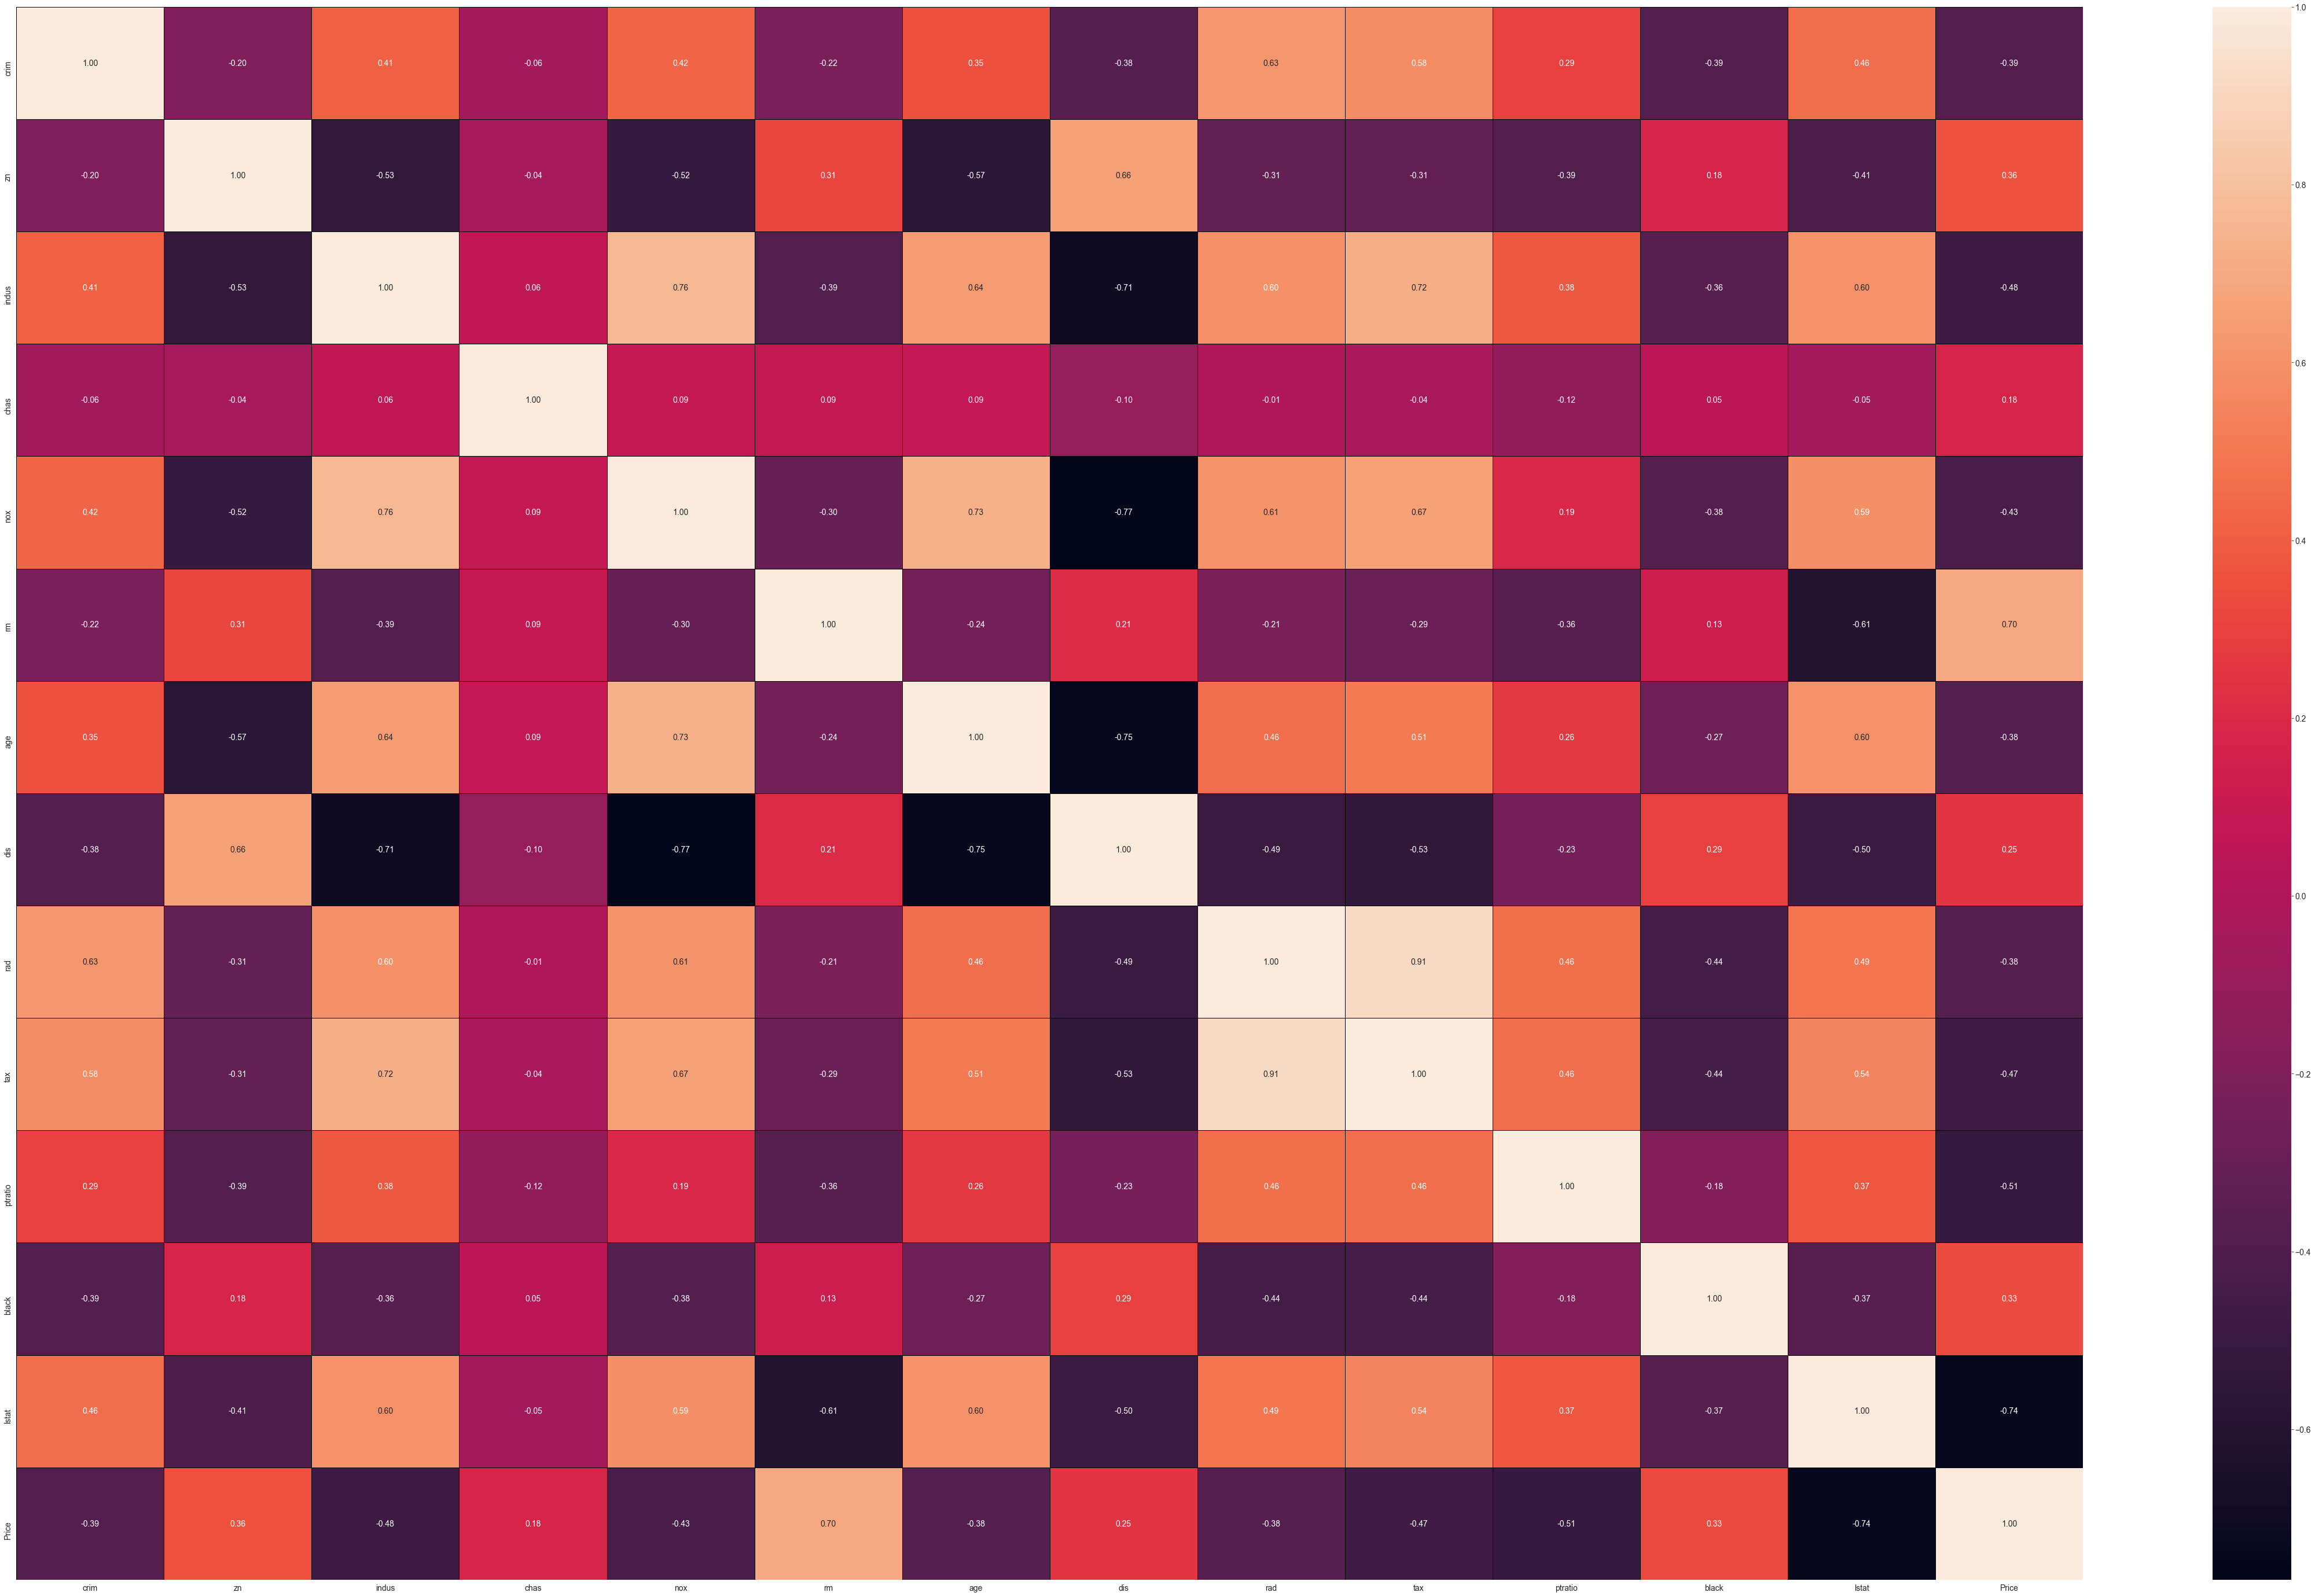

In [98]:
plt.figure(figsize=(80,50))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

The most positively correlated column with nox is indus and age.
the most negatively correlated column with nox is zn and dis.
Nox increases when the factors indus and age increases.
Nox decreases when the factors zn and dis increases.

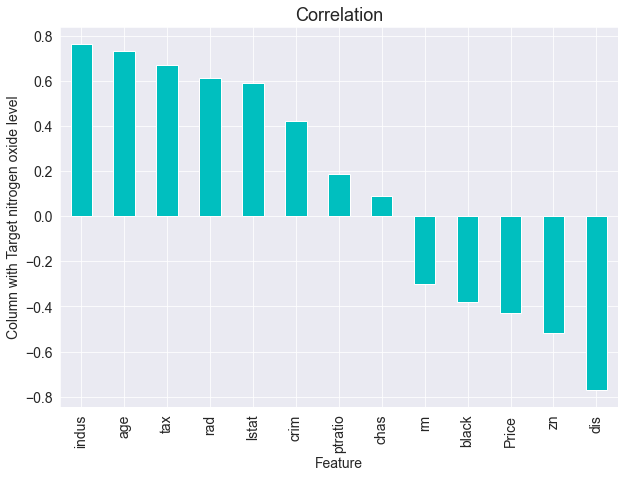

In [99]:
plt.figure(figsize=(10,7))
df.corr()['nox'].sort_values(ascending=False).drop(['nox']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target nitrogen oxide level',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [100]:
## Using Z-score to remove outliers

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

threshold=3
print(np.where(z>3))

df_new1=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df_new1.shape)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 10, 11,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  1,  4,
        4,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  6,  6,  1,  6,  6,  6,
        3,  3,  3,  3,  3,  4,  4,  4,  3,  3,  3, 11,  4, 11,  0,  0,  0,
        0,  4,  0, 10, 10, 10, 11,  0, 11, 10, 10,  0, 10, 10, 10, 10, 10,
       10,  0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10

some outliers got removed

In [101]:
#finds data loss
loss_percent=(506-415)/(506*100)
print(loss_percent)

0.0017984189723320159


Data loss percentage is very low.data is cleaned now

In [102]:
df_new1.shape

(415, 14)

This is new cleaned data set

## Skewness Removal and Scaling

In [103]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new1=power_transform(df_new1,method='yeo-johnson',standardize=False)
df_new1

array([[ 0.0062761 ,  0.97762083,  1.38274879, ...,  2.09352038,
         4.20800653,  0.1822292 ],
       [ 0.0265082 , -0.        ,  2.697444  , ...,  2.84503277,
         4.04062259,  0.17569754],
       [ 0.02648936, -0.        ,  2.697444  , ...,  1.86177333,
         4.82092383,  0.17569754],
       ...,
       [ 0.05692491, -0.        ,  3.51283109, ...,  2.23714351,
         4.20130773,  0.18494323],
       [ 0.09769927, -0.        ,  3.51283109, ...,  2.403734  ,
         4.06952618,  0.18494323],
       [ 0.04504321, -0.        ,  3.51283109, ...,  2.64974272,
         3.15823537,  0.18494323]])

In [104]:
df_for_model_NOX = pd.DataFrame(df_new1) 

In [105]:
## Seggregate Data

#seggregate input data and output data
x1=df_for_model_NOX.iloc[:,:-1]
y1=df_for_model_NOX.iloc[:,-1]

In [106]:
### Scaling

#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x1= mmscaler.fit_transform(x1)
x1

array([[0.        , 0.95516548, 0.20895743, ..., 1.        , 0.26988281,
        0.61372165],
       [0.02514441, 0.        , 0.48731066, ..., 1.        , 0.47323227,
        0.56250677],
       [0.02512099, 0.        , 0.48731066, ..., 0.89978583, 0.20717508,
        0.80125749],
       ...,
       [0.06294623, 0.        , 0.65994812, ..., 1.        , 0.30874536,
        0.611672  ],
       [0.11362051, 0.        , 0.65994812, ..., 0.91444131, 0.35382257,
        0.57135047],
       [0.04817968, 0.        , 0.65994812, ..., 1.        , 0.42038933,
        0.29252054]])

# MODEL EVALUATION

# REGRESSION :

# Linear Regression

In [107]:
#Linear Regression
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [108]:
#getting best accuracy with help of selecting random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.36,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)*100}")
    print(f"At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)*100}")
    print("\n")

At random state 0,the training accuracy is:87.52556028679192
At random state 0,the testing accuracy is:83.53480718833997


At random state 1,the training accuracy is:86.89760174745172
At random state 1,the testing accuracy is:84.69733019784462


At random state 2,the training accuracy is:86.29921195165204
At random state 2,the testing accuracy is:86.00684525153386


At random state 3,the training accuracy is:86.23706496556949
At random state 3,the testing accuracy is:85.79577370430071


At random state 4,the training accuracy is:86.7985855735864
At random state 4,the testing accuracy is:84.68073361233607


At random state 5,the training accuracy is:87.43519742226242
At random state 5,the testing accuracy is:83.99681133511994


At random state 6,the training accuracy is:85.44976422479009
At random state 6,the testing accuracy is:87.42633520613154


At random state 7,the training accuracy is:85.4137169272381
At random state 7,the testing accuracy is:87.09000193532526


At random state 8,

### evaluation metrics

In [109]:
print("Accuracy:", r2_score(y_test,pred_test)*100)

Accuracy: 83.0352539813355


In [110]:
#cross validation at random state
Train_accuracy=(r2_score(y_train,pred_train)*100)
Test_accuracy=r2_score(y_test,pred_test)*100
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_test,y_test,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for Training is {Train_accuracy} and accuracy score for Testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is 80.27079663273557 and accuracy score for Training is 87.25531258727567 and accuracy score for Testing is 83.0352539813355


At cross fold 3 the cv score is 83.40820774954398 and accuracy score for Training is 87.25531258727567 and accuracy score for Testing is 83.0352539813355


At cross fold 4 the cv score is 83.80531478128239 and accuracy score for Training is 87.25531258727567 and accuracy score for Testing is 83.0352539813355


At cross fold 5 the cv score is 82.87923453712015 and accuracy score for Training is 87.25531258727567 and accuracy score for Testing is 83.0352539813355


At cross fold 6 the cv score is 83.38692614958067 and accuracy score for Training is 87.25531258727567 and accuracy score for Testing is 83.0352539813355


At cross fold 7 the cv score is 81.79314389481853 and accuracy score for Training is 87.25531258727567 and accuracy score for Testing is 83.0352539813355


At cross fold 8 the cv score is 82.68869935142955 and accuracy s

# Hyper parameter Tuning

In [111]:
#perform gridsearchcv and cross val score on LinearRegression
from sklearn.model_selection import GridSearchCV

parameters={ 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False], 'n_jobs':[None,1,-1], 'positive':[True,False]}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}


In [112]:
lr=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, normalize= True, positive= False)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 83.0352539813355
score of model is: 87.25531258727565


In [113]:
cv_score_lr=cross_val_score(lr,x_test,y_test,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 82.87923453712021


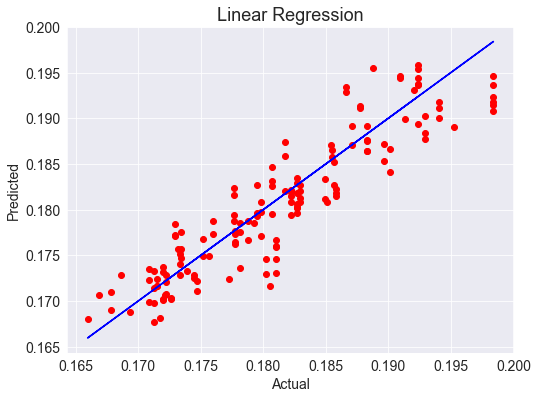

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [115]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))
print("r2_score is",r2_score(y_test,pred_test)*100)

mean absolute error 0.0025814620886052612
mean squared error 1.0560563512314092e-05
Root mean squared error 0.003249702065161373
r2_score is 83.0352539813355


# LASSO REGRESSION

# parameter tuning

In [116]:
#perform gridsearchcv and cross val score on lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [117]:
ls=Lasso(alpha=0.0001,random_state=0,fit_intercept= True, normalize= False,tol= 0.001)
ls.fit(x_train,y_train)
pred_test_ls=ls.predict(x_test)
pred_train_ls=ls.predict(x_train)
ls_score = ls.score(x_train,y_train)
ls_acc_score=r2_score(y_test,pred_test_ls)
print("Accuracy score is:",ls_acc_score*100)

Accuracy score is: 83.29876975302318


In [118]:
#checks cv score
for u in range(2,10):
    cv_score_ls=cross_val_score(ls,x,y,cv=5)
    cv_mean_ls=cv_score_ls.mean()
    print("At cv :-",j )
    print("cv_score is:",cv_mean_ls*100)
    print("accuracy score---r2_score is",ls_acc_score*100)

At cv :- 9
cv_score is: 54.79175748160403
accuracy score---r2_score is 83.29876975302318
At cv :- 9
cv_score is: 54.79175748160403
accuracy score---r2_score is 83.29876975302318
At cv :- 9
cv_score is: 54.79175748160403
accuracy score---r2_score is 83.29876975302318
At cv :- 9
cv_score is: 54.79175748160403
accuracy score---r2_score is 83.29876975302318
At cv :- 9
cv_score is: 54.79175748160403
accuracy score---r2_score is 83.29876975302318
At cv :- 9
cv_score is: 54.79175748160403
accuracy score---r2_score is 83.29876975302318
At cv :- 9
cv_score is: 54.79175748160403
accuracy score---r2_score is 83.29876975302318
At cv :- 9
cv_score is: 54.79175748160403
accuracy score---r2_score is 83.29876975302318


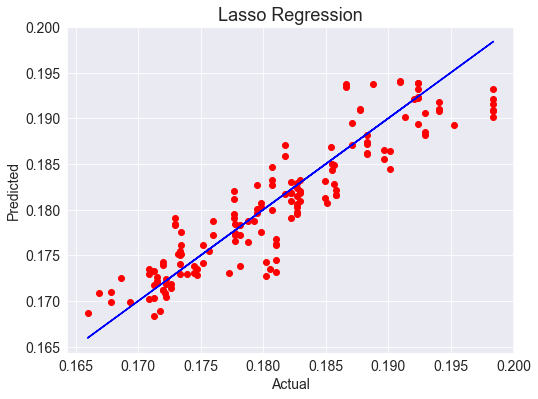

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [120]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_ls))
print("mean squared error",mean_squared_error(y_test,pred_test_ls))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print("r2_score is",r2_score(y_test,pred_test_ls)*100)

mean absolute error 0.002505275243117841
mean squared error 1.0396524802843137e-05
Root mean squared error 0.0032243642478546274
r2_score is 83.29876975302318


# RANDOM FOREST REGRESSION

# parameter tuning

In [121]:
#perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['squared_error', 'mse','absolute_error'],'max_features':["auto","sqrt"],'bootstrap': [True, False],'min_samples_split':[1,2],'min_samples_leaf':[1,2]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'bootstrap': False, 'criterion': 'absolute_error', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [123]:
rf=RandomForestRegressor(criterion="absolute_error",max_features="sqrt",bootstrap= False,min_samples_leaf= 1, min_samples_split=2)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 83.0352539813355
score of model is: 100.0


In [124]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 62.48522004617565


In [125]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rf))
print("mean squared error",mean_squared_error(y_test,pred_test_rf))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("r2_score is",r2_score(y_test,pred_test_rf)*100)

mean absolute error 0.0013897195484968788
mean squared error 4.489872460780832e-06
Root mean squared error 0.0021189319150885506
r2_score is 92.7873597024888


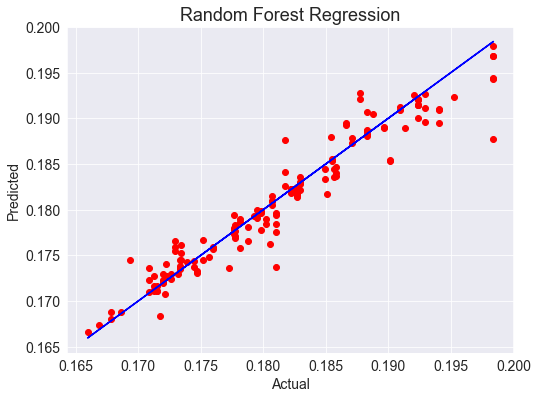

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

# RIDGE REGRESSION

In [127]:
#perform gridsearchcv and cross val score on Ridge Regressor
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [128]:
rd=Ridge(alpha=0.01,fit_intercept=True,normalize=True,random_state=0,tol=0.001)
rd.fit(x_train,y_train)
pred_test_rd=rd.predict(x_test)
pred_train_rd=rd.predict(x_train)
rd_score = rd.score(x_train,y_train)
rd_acc_score=r2_score(y_test,pred_test_rd)
print("Accuracy score is:",rd_acc_score*100)
print("score of model is:",rd_score*100)

Accuracy score is: 83.24242956151737
score of model is: 87.2462936084597


In [129]:
cv_score_rd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cv_score_rd.mean()
print("cv_mean is:",cv_mean_rd*100)

cv_mean is: 55.24204992521222


In [130]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rd))
print("mean squared error",mean_squared_error(y_test,pred_test_rd))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print("r2_score is",r2_score(y_test,pred_test_rd)*100)

mean absolute error 0.002561580901474817
mean squared error 1.0431596602328874e-05
Root mean squared error 0.003229798229352551
r2_score is 83.24242956151737


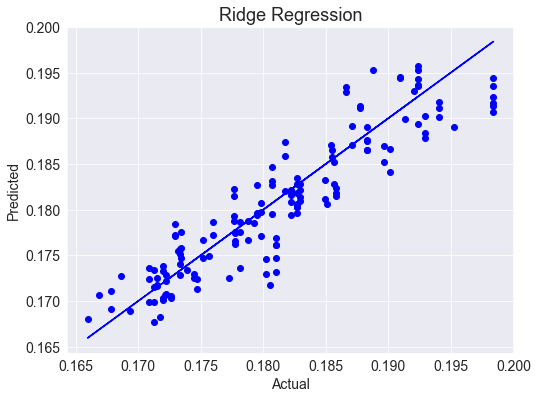

In [131]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# DECISION TREE REGRESSOR

In [132]:
#perform gridsearchcv and cross val score on Decison Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'random_state': 2, 'splitter': 'best'}


In [133]:
dt=DecisionTreeRegressor(criterion='mse',max_features= 'auto', min_weight_fraction_leaf= 0.1, random_state= 2, splitter= 'best')
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=r2_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 80.7520507255806
score of model is: 87.07801410774847


In [134]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 37.41740150757941


In [135]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_dt))
print("mean squared error",mean_squared_error(y_test,pred_test_dt))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_dt)))
print("r2_score is",r2_score(y_test,pred_test_dt)*100)

mean absolute error 0.0026471276977556896
mean squared error 1.1981858765858949e-05
Root mean squared error 0.0034614821631577058
r2_score is 80.7520507255806


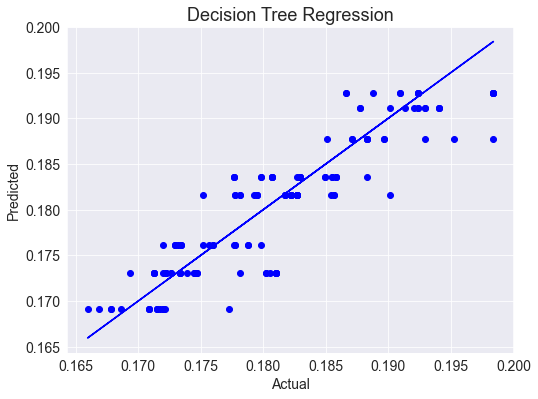

In [136]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_dt,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# GRADIENT BOOSTING REGRESSOR

In [137]:
#perform gridsearchcv and cross val score on  GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100],'criterion':['friedman_mse','mse'],'learning_rate':[0.05],'max_depth' : [1,3,5,7,9,11,12],'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 7, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}


In [138]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=100,learning_rate= 0.05,max_depth= 7, min_weight_fraction_leaf= 0.1)
gbr.fit(x_train,y_train)
pred_test_gbr=gbr.predict(x_test)
pred_train_gbr=gbr.predict(x_train)
gbr_score = gbr.score(x_train,y_train)
gbr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",gbr_acc_score*100)
print("score of model is:",gbr_score*100)

Accuracy score is: 83.0352539813355
score of model is: 95.83607466637235


In [139]:
cv_score_gbr=cross_val_score(gbr,x,y,cv=5)
cv_mean_gbr=cv_score_gbr.mean()
print("cv_mean is:",cv_mean_gbr*100)

cv_mean is: 62.17679025392929


In [140]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_gbr))
print("mean squared error",mean_squared_error(y_test,pred_test_gbr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_gbr)))
print("r2_score is",r2_score(y_test,pred_test_gbr)*100)

mean absolute error 0.0019640940650688552
mean squared error 6.753145207862971e-06
Root mean squared error 0.0025986814363948055
r2_score is 89.15158332744572


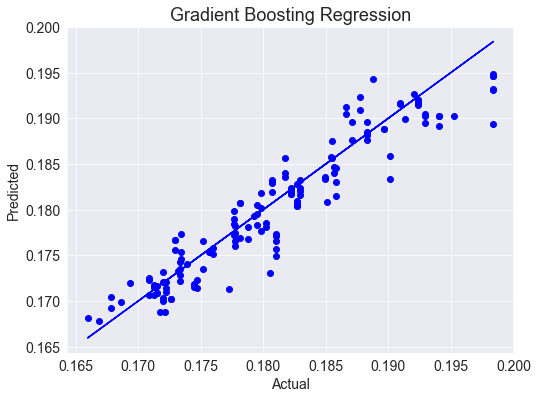

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gbr,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

# SUPPORT VECTOR REGRESSOR

In [142]:
#perform gridsearchcv and cross val score on Support Vector Regressor
from sklearn.svm import SVR
parameters ={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale', 'auto'],'tol':[0.01,0.0001,0.001],'shrinking':[True,False],'degree':[3,4,5],'max_iter':[1,2,-1]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 1, 'shrinking': True, 'tol': 0.01}


In [143]:
sv=SVR(kernel='linear',gamma='scale',degree= 3, max_iter= 1, shrinking= True, tol= 0.01)
sv.fit(x_train,y_train)
pred_test_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
sv_score = sv.score(x_train,y_train)
sv_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",sv_acc_score*100)
print("score of model is:",sv_score*100)

Accuracy score is: 83.0352539813355
score of model is: -0.10281182631246555


In [144]:
cv_score_sv=cross_val_score(sv,x,y,cv=5)
cv_mean_sv=cv_score_sv.mean()
print("cv_mean is:",cv_mean_sv*100)

cv_mean is: -59.20881636362909


In [145]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_sv))
print("mean squared error",mean_squared_error(y_test,pred_test_sv))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_sv)))
print("r2_score is",r2_score(y_test,pred_test_sv)*100)

mean absolute error 0.006533642791347132
mean squared error 6.251083536765558e-05
Root mean squared error 0.007906379409543637
r2_score is -0.4189259588523786


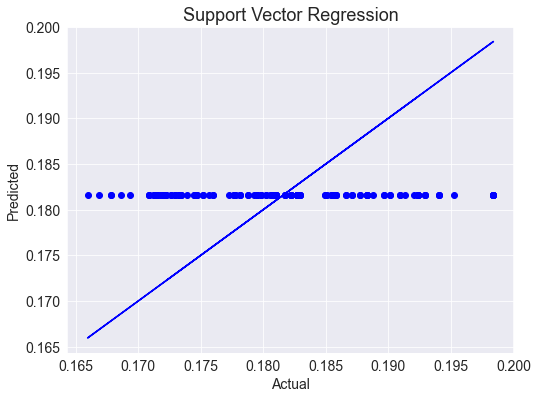

In [146]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_sv,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

# ELASTIC NET REGRESSION(COMBINATION OF L1 AND L2)

In [147]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
enr=ElasticNet()
clf=GridSearchCV(enr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [148]:
enr=ElasticNet(alpha=0.0001,fit_intercept= True,normalize= False, random_state= 0, tol= 0.001)
enr.fit(x_train,y_train)
pred_test_enr=enr.predict(x_test)
pred_train_enr=enr.predict(x_train)
enr_score = enr.score(x_train,y_train)
enr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",enr_acc_score*100)
print("score of model is:",enr_score*100)

Accuracy score is: 83.0352539813355
score of model is: 86.8356919402643


In [149]:
cv_score_enr=cross_val_score(enr,x,y,cv=5)
cv_mean_enr=cv_score_enr.mean()
print("cv_mean is:",cv_mean_enr*100)

cv_mean is: 54.788791596934615


In [150]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_enr))
print("mean squared error",mean_squared_error(y_test,pred_test_enr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_enr)))
print("r2_score is",r2_score(y_test,pred_test_enr)*100)

mean absolute error 0.0024887030651141893
mean squared error 1.029580188532081e-05
Root mean squared error 0.0032087071984400212
r2_score is 83.46057349692688


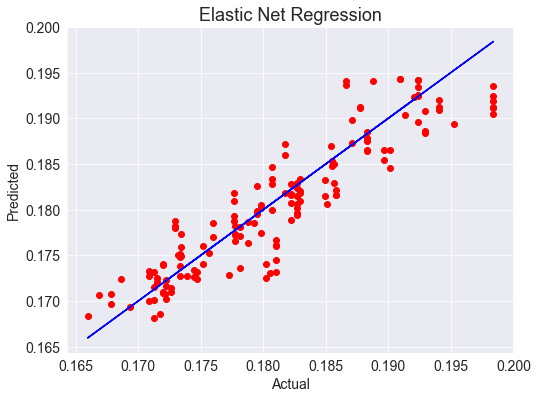

In [151]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_enr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Elastic Net Regression',fontsize=18)
plt.show()

# CONCLUSION

## OUTPUT

In [156]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ls.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con

Original  Predicted
0    0.172260   0.171871
1    0.180688   0.182746
2    0.181040   0.176224
3    0.181727   0.185844
4    0.177673   0.179521
5    0.166835   0.170910
6    0.188323   0.186107
7    0.170892   0.170253
8    0.169342   0.169876
9    0.180241   0.172793
10   0.194084   0.190749
11   0.171271   0.170331
12   0.182720   0.179536
13   0.170892   0.172984
14   0.182720   0.180616
15   0.182961   0.181769
16   0.174484   0.173115
17   0.173915   0.173003
18   0.172126   0.170893
19   0.184943   0.181318
20   0.189657   0.186538
21   0.177773   0.177211
22   0.171521   0.172675
23   0.182961   0.181999
24   0.192939   0.190587
25   0.180511   0.173553
26   0.182229   0.182980
27   0.178169   0.173799
28   0.187136   0.189502
29   0.185088   0.180770
30   0.198403   0.190886
31   0.173335   0.175425
32   0.181727   0.187064
33   0.198403   0.192060
34   0.192350   0.192207
35   0.172260   0.170417
36   0.172622   0.171847
37   0.187709   0.191032
38   0.195240   0.189217
39   0.182720   0.179691
40   0.177773   0.176546
41   0.198403   0.190182
42   0.171521   0.172138
43   0.175698   0.175435
44   0.177673   0.182021
45   0.179508   0.179654
46   0.186612   0.193769
47   0.181040   0.176168
48   0.177773   0.177414
49   0.167827   0.169897
50   0.175153   0.176098
51   0.176019   0.177194
52   0.177773   0.178400
53   0.172981   0.178306
54   0.173335   0.174994
55   0.172016   0.173912
56   0.185445   0.186881
57   0.182961   0.183272
58   0.181040   0.176748
59   0.198403   0.193252
60   0.185796   0.181616
61   0.192939   0.188479
62   0.173452   0.175145
63   0.188323   0.187439
64   0.179508   0.182710
65   0.182229   0.181797
66   0.179227   0.178734
67   0.172016   0.171189
68   0.192022   0.192065
69   0.178752   0.176492
70   0.171769   0.168961
71   0.168655   0.172539
72   0.179786   0.177596
73   0.174709   0.173538
74   0.172622   0.171391
75   0.179786   0.180698
76   0.179508   0.180078
77   0.172260   0.172443
78   0.190938   0.194051
79   0.192350   0.192328
80   0.198403   0.191605
81   0.172016   0.174242
82   0.182229   0.179065
83   0.178169   0.177281
84   0.185656   0.182853
85   0.192350   0.193874
86   0.185796   0.181560
87   0.178752   0.178796
88   0.185516   0.184366
89   0.179786   0.180336
90   0.182961   0.180899
91   0.174709   0.172814
92   0.194084   0.191738
93   0.171271   0.168326
94   0.172981   0.178448
95   0.177269   0.173056
96   0.171271   0.173338
97   0.177673   0.179051
98   0.188323   0.188122
99   0.180688   0.183273
100  0.172016   0.171256
101  0.173452   0.177549
102  0.167827   0.170997
103  0.181040   0.174508
104  0.182720   0.180268
105  0.186612   0.193384
106  0.190096   0.184406
107  0.173217   0.175096
108  0.181727   0.181736
109  0.185516   0.184948
110  0.187136   0.187043
111  0.198403   0.190819
112  0.182720   0.181473
113  0.192939   0.188198
114  0.177673   0.181174
115  0.192350   0.193216
116  0.181040   0.173213
117  0.172981   0.179065
118  0.185796   0.182106
119  0.185656   0.184923
120  0.191342   0.190184
121  0.175153   0.174128
122  0.173335   0.174061
123  0.187709   0.190947
124  0.190096   0.186406
125  0.180241   0.174289
126  0.188741   0.193792
127  0.192350   0.193886
128  0.174484   0.173863
129  0.170892   0.173532
130  0.190938   0.194017
131  0.171271   0.171723
132  0.180688   0.179965
133  0.171521   0.172165
134  0.182229   0.181808
135  0.173335   0.172909
136  0.176019   0.178755
137  0.165962   0.168744
138  0.182720   0.182351
139  0.173452   0.176169
140  0.178169   0.178312
141  0.188323   0.187133
142  0.189657   0.185509
143  0.180688   0.184646
144  0.194084   0.191057
145  0.182720   0.182929
146  0.188323   0.186207
147  0.184943   0.183161
148  0.182229   0.180900
149  0.192350   0.189404

In [157]:
import pickle
filename='BOSTON_HOUSE_SALES_PRICE _PREDICTION__NOX_ls.pkl'
pickle.dump(ls,open(filename,'wb'))

In [152]:
models=['Linear Regression','Lasso regression','RandomForestRegressor','Ridge Regressor','Decison Tree Regressor','GradientBoostingRegressor'
,'Support Vector Regressor','ElasticNet Regression']

In [153]:
scores=[ r2_score(y_test,pred_test)*100,ls_acc_score*100,rf_acc_score*100,rd_acc_score*100,dt_acc_score*100,gbr_acc_score*100,sv_acc_score*100,enr_acc_score*100]
scores

[83.0352539813355,
 83.29876975302318,
 83.0352539813355,
 83.24242956151737,
 80.7520507255806,
 83.0352539813355,
 83.0352539813355,
 83.0352539813355]

In [154]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8]

In [155]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.sort_values(by='Scores', ascending=False).style.hide_index()

## CONCLUSION

From the above models,Lasso Regressor performs well,Becauseit has a good value and is essential to the performance.since it controls the strength of shrinkage and variable selection, which, in moderation can improve both prediction accuracy and interpretability.

This is our Best Fit Model.So we save this model for our analysis

## KEY FINDINGS

The More Nitrogen Oxide Level causes Pollution.And its not right choice for better place to buy too.The nox level depends on the factors mainly like indus(proportion of non-retail business acres per town),age,proportion of residential land zoned for lots over 25,000 sq.ft(zn) and weighted distances to five Boston employment centres(dis).

In [158]:
df_con.to_csv("BOSTON_HOUSE_SALES_PRICE _PREDICTION_NOX_ls.csv",sep='\t')